In [14]:
## %matplotlib inline
#enable plotting inline within the notebook

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]
#make the plots larger -- numbers are x and y, in inches

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#this just allows me to increase the width of the notebook display

/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/3000401109.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Big-Picture-Exercise:-errors-on-the-Hubble-Constant-from-the-fake-data-set" data-toc-modified-id="Big-Picture-Exercise:-errors-on-the-Hubble-Constant-from-the-fake-data-set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Big Picture Exercise: errors on the Hubble Constant from the fake data set</a></span></li><li><span><a href="#Heads-Up:-Don't-worry-about-fancy-plotting-and-tricks-like-np.meshgrid()" data-toc-modified-id="Heads-Up:-Don't-worry-about-fancy-plotting-and-tricks-like-np.meshgrid()-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Heads-Up: Don't worry about fancy plotting and tricks like np.meshgrid()</a></span></li><li><span><a href="#Contours-of-constant-$\Delta\chi^2$-as-confidence-regions" data-toc-modified-id="Contours-of-constant-$\Delta\chi^2$-as-confidence-regions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Contours of constant $\Delta\chi^2$ as confidence regions</a></span><ul class="toc-item"><li><span><a href="#Why-are-contours-of-constant-$\chi^2$-a-natural-way-to-determine-parameter-uncertainties?" data-toc-modified-id="Why-are-contours-of-constant-$\chi^2$-a-natural-way-to-determine-parameter-uncertainties?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Why are contours of constant $\chi^2$ a natural way to determine parameter uncertainties?</a></span><ul class="toc-item"><li><span><a href="#Example:-1-D----fitting-the-slope-of-a-line" data-toc-modified-id="Example:-1-D----fitting-the-slope-of-a-line-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Example: 1-D -- fitting the slope of a line</a></span></li><li><span><a href="#Example:-2-D----fitting-the-slope-and-intercept-of-a-line" data-toc-modified-id="Example:-2-D----fitting-the-slope-and-intercept-of-a-line-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Example: 2-D -- fitting the slope and intercept of a line</a></span></li></ul></li><li><span><a href="#Assigning-a-specific-confidence-level-to-a-specific-$\Delta\chi^2$" data-toc-modified-id="Assigning-a-specific-confidence-level-to-a-specific-$\Delta\chi^2$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Assigning a specific confidence <em>level</em> to a specific $\Delta\chi^2$</a></span><ul class="toc-item"><li><span><a href="#Models-with-a-single-adjustable-(&quot;free&quot;)-parameter" data-toc-modified-id="Models-with-a-single-adjustable-(&quot;free&quot;)-parameter-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Models with a single adjustable ("free") parameter</a></span><ul class="toc-item"><li><span><a href="#Example:-Testing-the-$\Delta\chi^2$-confidence-intervals-for-a-single-free-parameter" data-toc-modified-id="Example:-Testing-the-$\Delta\chi^2$-confidence-intervals-for-a-single-free-parameter-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Example: Testing the $\Delta\chi^2$ confidence intervals for a single free parameter</a></span></li></ul></li><li><span><a href="#Models-with-$M$-adjustable-(&quot;free&quot;)-parameters" data-toc-modified-id="Models-with-$M$-adjustable-(&quot;free&quot;)-parameters-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Models with $M$ adjustable ("free") parameters</a></span><ul class="toc-item"><li><span><a href="#Example:-Testing-the-$\Delta\chi^2$-confidence-intervals-for-a-model-with-two-free-parameters" data-toc-modified-id="Example:-Testing-the-$\Delta\chi^2$-confidence-intervals-for-a-model-with-two-free-parameters-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>Example: Testing the $\Delta\chi^2$ confidence intervals for a model with two free parameters</a></span></li></ul></li></ul></li><li><span><a href="#$\Delta\chi^2$-in-practice:-estimating-parameter-errors-via-the-brute-force-gridding-method" data-toc-modified-id="$\Delta\chi^2$-in-practice:-estimating-parameter-errors-via-the-brute-force-gridding-method-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>$\Delta\chi^2$ in practice: estimating parameter errors via the brute-force gridding method</a></span><ul class="toc-item"><li><span><a href="#A-single-free-parameter" data-toc-modified-id="A-single-free-parameter-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>A single free parameter</a></span><ul class="toc-item"><li><span><a href="#Example:-The-error-on-the-slope-of-a-linear-fit-with-fixed-intercept" data-toc-modified-id="Example:-The-error-on-the-slope-of-a-linear-fit-with-fixed-intercept-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Example: The error on the slope of a linear fit with fixed intercept</a></span></li><li><span><a href="#Exercise:-The-error-on-the-slope-of-a-linear-fit-with-fixed-intercept" data-toc-modified-id="Exercise:-The-error-on-the-slope-of-a-linear-fit-with-fixed-intercept-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Exercise: The error on the slope of a linear fit with fixed intercept</a></span></li><li><span><a href="#Exercise:-The-error-on-the-intercept-of-a-linear-fit-with-fixed-slope" data-toc-modified-id="Exercise:-The-error-on-the-intercept-of-a-linear-fit-with-fixed-slope-3.3.1.3"><span class="toc-item-num">3.3.1.3&nbsp;&nbsp;</span>Exercise: The error on the intercept of a linear fit with fixed slope</a></span></li></ul></li><li><span><a href="#Several-free-parameters" data-toc-modified-id="Several-free-parameters-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Several free parameters</a></span><ul class="toc-item"><li><span><a href="#Example:-The-error-on-the-slope-of-a-linear-fit-with-free-slope-and-intercept" data-toc-modified-id="Example:-The-error-on-the-slope-of-a-linear-fit-with-free-slope-and-intercept-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Example: The error on the slope of a linear fit with free slope and intercept</a></span></li><li><span><a href="#Exercise:-The-error-on-the-slope-and-intercept-of-a-linear-fit" data-toc-modified-id="Exercise:-The-error-on-the-slope-and-intercept-of-a-linear-fit-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>Exercise: The error on the slope and intercept of a linear fit</a></span></li></ul></li></ul></li><li><span><a href="#$\Delta\chi^2$-in-practice:-estimating-parameter-errors-with-curve_fit()" data-toc-modified-id="$\Delta\chi^2$-in-practice:-estimating-parameter-errors-with-curve_fit()-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>$\Delta\chi^2$ in practice: estimating parameter errors with <em>curve_fit()</em></a></span><ul class="toc-item"><li><span><a href="#Parameter-errors-from-the-covariance-matrix" data-toc-modified-id="Parameter-errors-from-the-covariance-matrix-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Parameter errors from the covariance matrix</a></span></li><li><span><a href="#Example:-A-typical-call-to-curve_fit()" data-toc-modified-id="Example:-A-typical-call-to-curve_fit()-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Example: A typical call to <em>curve_fit()</em></a></span></li></ul></li><li><span><a href="#(Removing)-correlations-between-parameter-errors" data-toc-modified-id="(Removing)-correlations-between-parameter-errors-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>(Removing) correlations between parameter errors</a></span><ul class="toc-item"><li><span><a href="#Reducing-or-removing-correlations" data-toc-modified-id="Reducing-or-removing-correlations-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Reducing or removing correlations</a></span></li></ul></li><li><span><a href="#The-assumptions-underlying-the-$\Delta\chi^2$-method" data-toc-modified-id="The-assumptions-underlying-the-$\Delta\chi^2$-method-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>The assumptions underlying the $\Delta\chi^2$ method</a></span></li></ul></li><li><span><a href="#(Optional/Bonus:)-Confidence-regions-from-simulations:-creating-the-data-we-might-have-obtained" data-toc-modified-id="(Optional/Bonus:)-Confidence-regions-from-simulations:-creating-the-data-we-might-have-obtained-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>(Optional/Bonus:) Confidence regions from simulations: creating the data we might have obtained</a></span><ul class="toc-item"><li><span><a href="#Mock-data-from-Monte-Carlo-simulations" data-toc-modified-id="Mock-data-from-Monte-Carlo-simulations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Mock data from Monte Carlo simulations</a></span></li><li><span><a href="#Mock-data-from-bootstrapping" data-toc-modified-id="Mock-data-from-bootstrapping-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mock data from bootstrapping</a></span></li><li><span><a href="#The-Golden-Rules-of-Mock-Data" data-toc-modified-id="The-Golden-Rules-of-Mock-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>The Golden Rules of Mock Data</a></span></li></ul></li><li><span><a href="#Big-Picture-Exercise:-errors-on-the-Hubble-Constant-from-the-fake-data-set" data-toc-modified-id="Big-Picture-Exercise:-errors-on-the-Hubble-Constant-from-the-fake-data-set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Big Picture Exercise: errors on the Hubble Constant from the fake data set</a></span></li></ul></div>

# Lesson 12: 
# model fitting III -- what are the errors on my model parameters?

## [Optional] Big Picture Exercise: errors on the Hubble Constant from the fake data set

In the last two sessions, our big picture exercises were (i) creating a fake galaxy data set from which the Hubble Constant could be measured; (ii) fitting this fake data set to get a best-fit Hubble Constant from the fit. The fake data consisted of distances, distance errors and recession velocities for a set of galaxies.

Building on this, in today's Big Picture Exercise we'll derive the 1-$\sigma$ uncertainties on the best-fit Hubble Constant and check if this agrees with the true (input) value.

The main thing I'd like you to do is derive the error on your best-fit $H_0$ via the $\Delta\chi^2 = 1$ method we'll discuss in detail today.

If you have time and are interested, it would be awesome if you could also have a go at deriving errors on $H_0$ via simulations, using the two methods we'll briefly touch on in the bonus material:

* Monte Carlo simulations
* Bootstrapping

This is purely optional though.

We have seen now how we can use $\chi^2$ as a goodness-of-fit metric to identify the best-fitting model for a given data set. 

More specifically, suppose we're given a data set containing $N$ points, i.e. $(x_i, y_i)$ with $i = 1...N$, and a model for this data that also depends on $M$ unknown parameters, i.e. $y_m(x; a_j)$ with $j = 1...M$. Then the "optimal" set of parameters $a_{j}^*$ is that which minimizes the $\chi^2$ of the model with respect to the data, 

$$ \chi^2 = \sum_{i=1}^{N} \frac{\left(y_i - y_{m,i}\right)^2}{\sigma_i^2}.$$

However, there is one key question we have not yet addressed at all: *what are the uncertainties on the best-fitting parameters?*

This is the question we'll tackle in this session. Specifically, we will learn how to estimate confidence intervals for model parameters in two ways:

1. based on the theoretically expected statistical properties of $\chi^2$ fits under a certain set of assumptions;

2. based on numerical simulations that allow us to derive error estimates even in situations where such assumptions may not be valid.

## Heads-Up: Don't worry about fancy plotting and tricks like np.meshgrid()

In today's session, I'll make some fairly fancy plots and use some Python tricks we haven't really looked at to do so. I will provide the code so you can play with it, but please note that this is purely for the purpose of making nice illustrations for teaching. You do *not* have to do that in your own work. Things like fancy contour plots etc are nice, and they can be very helpful in understanding what's going on when we fit a model to data, but you don't necessarily have to use them in everyday analysis. It is not required for you to create fancy plots like this in Assignment 2, for example.

## Contours of constant $\Delta\chi^2$ as confidence regions

If our optimal model parameters $a_{j}^*$ were estimated by minimizing $\chi^2$, we can immediately obtain error estimates for them. Strictly speaking, these estimates are only valid if our model and data satisfy a set of assumptions we'll discuss below. However, before we get into that level of detail, let's see how this method actually works.

### Why are contours of constant $\chi^2$ a natural way to determine parameter uncertainties?

The idea behind these error estimates is simple:

* $\chi^2$ defines the "goodness-of-fit" of a model with respect to our data.
<br><br>
* So all models with the *same* $\chi^2$ must be equally good (or bad), i.e. all such models are equally likely.
<br><br>
* Suppose the *best* (minimum $\chi^2$) model has parameters $a_j^*$ and achieves $\chi^2_{min}$. 
<br><br>
* Then each contour of constant $\Delta\chi^2 = \chi^2 - \chi^2_{min}$ in parameter space around  $a_j^*$ defines a set of equally likely models.
<br><br>
* It is therefore natural to adopt such contours as confidence intervals for the $a_j$.

Let's gain some intuition here by looking at the same specific 1-D and 2-D examples we investigated last time.

#### Example: 1-D -- fitting the slope of a line

We're given a set of $N$ data points, $(x_i, y_i)$ which we think lie on a straight line with known intercept. Let's determine the best-fitting slope by minimizing $\chi^2$ on a grid of trial slopes and plot the dependence of $\chi^2$ on the model slope.

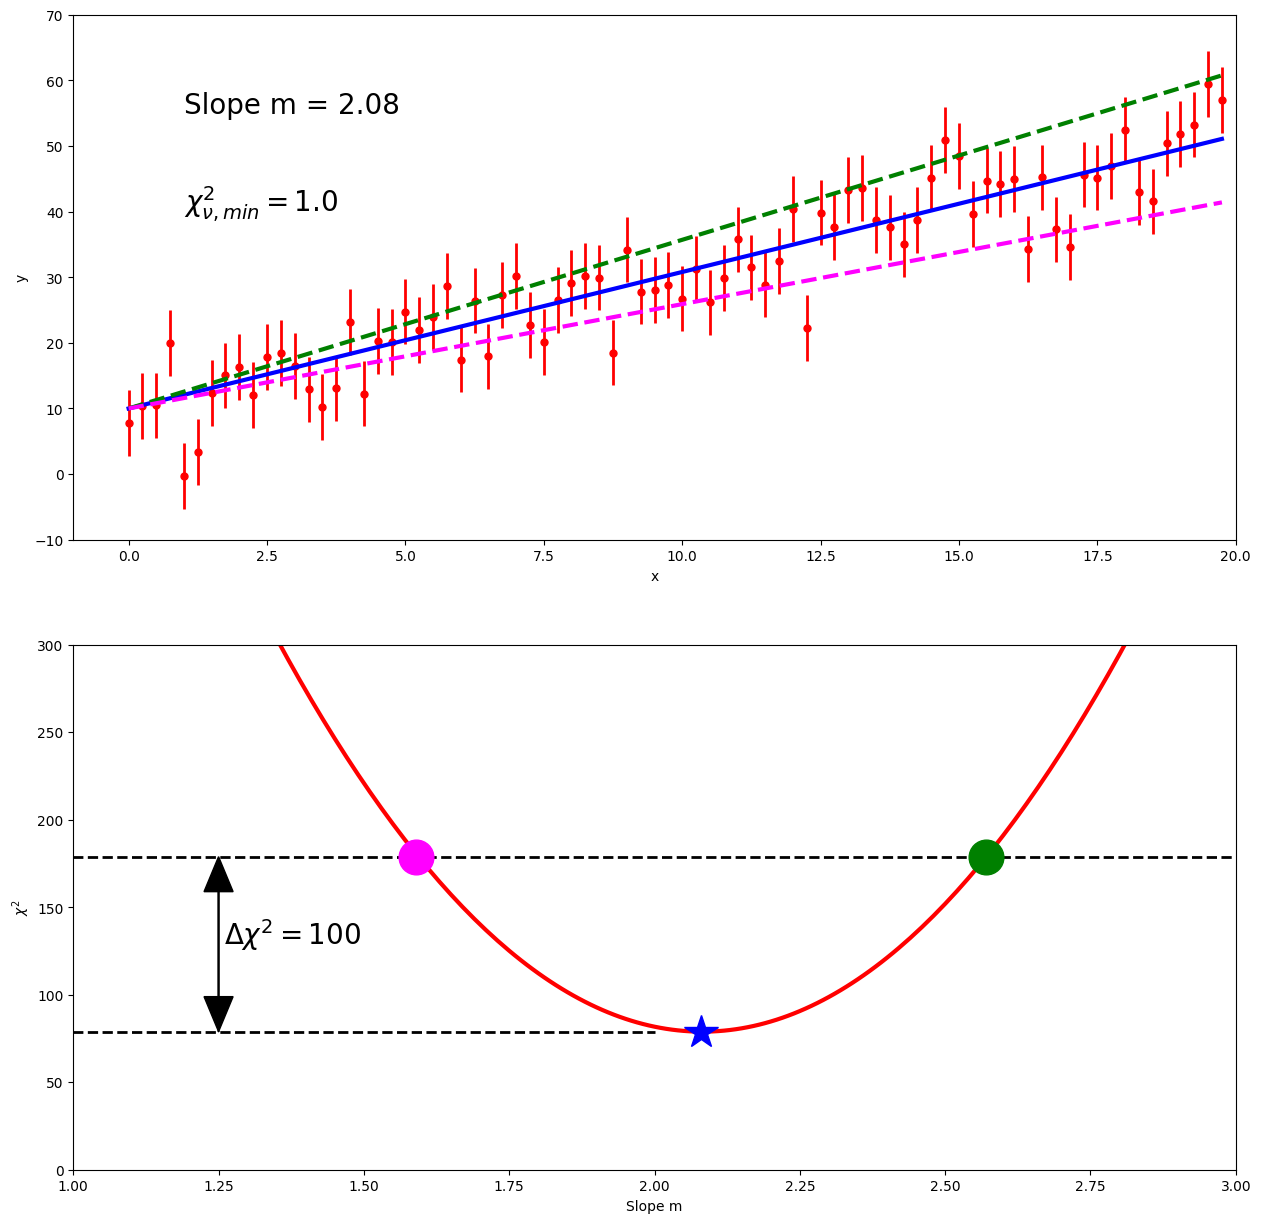

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2
        

#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-1.0 #the number of degrees of freedom; M = 1 -- slope


#now we create a grid of slopes and calculate chi-squared for each of them
slopes = np.arange(0.5, 3.3, 0.01) #the grid of slopes we're going to test
chi2 = 1.e5 + slopes*0.0 #setting up the grid of chisquareds  
best_slope = 1.e5 
best_chi2 = 1.e5
i = 0
for m in slopes:
    y_test = m*x + intercept
    chi2[i] = chisq(y, sig_y, y_test)
    if (chi2[i] < best_chi2):
        best_chi2 = chi2[i]
        best_slope = m
    i = i + 1
        
plt.subplot(2,1,2)
plt.xlabel('Slope m')
plt.ylabel(r'$\chi^2$')
plt.plot(slopes, chi2, color='red', marker="None", linewidth=3, linestyle="-")
plt.plot(best_slope, best_chi2, color='blue', marker="*", markersize=25)
plt.axis([1, 3.0, 0, 300])
#
#draw a horizontal line across the plot a chisq_min
slopes_plot = np.arange(-1, best_slope, 0.1)
chi2_ref_plot = best_chi2 + 0.0*slopes_plot
plt.plot(slopes_plot, chi2_ref_plot, color='black', marker='None', linewidth=2, linestyle='--')
#draw a horizontal line across chi2 vs slope at some arbitrary delta_chisq
delta_chi2 = 100
slopes_plot = np.arange(-1, 10, 0.1)
chi2_ref_plot = best_chi2 + delta_chi2 + 0.0*slopes_plot
plt.plot(slopes_plot, chi2_ref_plot, color='black', marker='None', linewidth=2, linestyle='--')

#find the intersection points with our chisq vs slope curve
#we'll do this in a noddy way: we work out the difference between
#our adopted constant value and curve at each slope. The two 
#slopes with the lowest absolute values of these differences must then be 
#the closest points on our grid to the intercepts
chi2_ref = best_chi2 + delta_chi2 + 0.0*slopes
absdiff = np.absolute(chi2_ref-chi2)
sort_index = np.argsort(absdiff)
test_slope1 = slopes[sort_index[0]]
test_slope2 = slopes[sort_index[1]]
test_chi2_ref = best_chi2 + delta_chi2 
plt.plot(test_slope1, test_chi2_ref, color='green', marker="o", markersize=25)
plt.plot(test_slope2, test_chi2_ref, color='magenta', marker="o", markersize=25)
plt.arrow(1.25, best_chi2, 0.0, delta_chi2, head_width=0.05, head_length=20, 
          fc='k', ec='k', shape='full', length_includes_head=True)
plt.arrow(1.25, best_chi2+delta_chi2-20, 0.0, -(delta_chi2-20), head_width=0.05, head_length=20, 
          fc='k', ec='k', shape='full', length_includes_head=True)
c2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2, 0))
plt.text(1.26, best_chi2+(0.5*delta_chi2), c2string, fontsize=20)


plt.subplot(2,1,1)
y_best = best_slope*x + intercept 
y_test1 = test_slope1*x + intercept
y_test2 = test_slope2*x + intercept
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(x, y, yerr=sig_y, color="red", linewidth=2, linestyle="None")
plt.plot(x, y_best, color='blue', marker="None", linewidth=3, linestyle="-")
plt.plot(x, y_test1, color='green', marker="None", linewidth=3, linestyle="dashed")
plt.plot(x, y_test2, color='magenta', marker="None", linewidth=3, linestyle="dashed")
c2string = r'$\chi_{\nu,min}^2 =$' +  str(np.round(best_chi2/(x.size-1.0), 2))
plt.text(1.0, 40, c2string, fontsize=20)
sstring = 'Slope m = ' +  str(np.round(best_slope, 2))
plt.text(1.0, 55, sstring, fontsize=20)
plt.axis([-1, 20, -10, 70])


plt.show()

In addition to the best-fitting model, the plot above also shows two other models on top of the data. These were selected as illustrated in the bottom panel, by chosing two slopes that correspond to the same $\Delta\chi^2$ offset from $\chi^2_{min}$.

Our claim is that this selection should yield models that are equally good (or equally bad) fits to the data. Based on an inspection of the top panel of the plot, we can hopefully all agree that this claim seems pretty good (at least for this particular model).

Let's extend this to the situation where we have *two* model parameters, again drawing on the same example as in the previous session. Now, in two dimensions, models with the same $\chi^2$ define an actual *contour* line in parameter space. We will use matplotlib to draw that contour for us.

#### Example: 2-D -- fitting the slope and intercept of a line

We're given a set of $N$ data points, $(x_i, y_i)$ which we think lie on a straight line with unknown slope and intercept.

/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/714507608.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  v = cs.collections[0].get_paths()[0].vertices


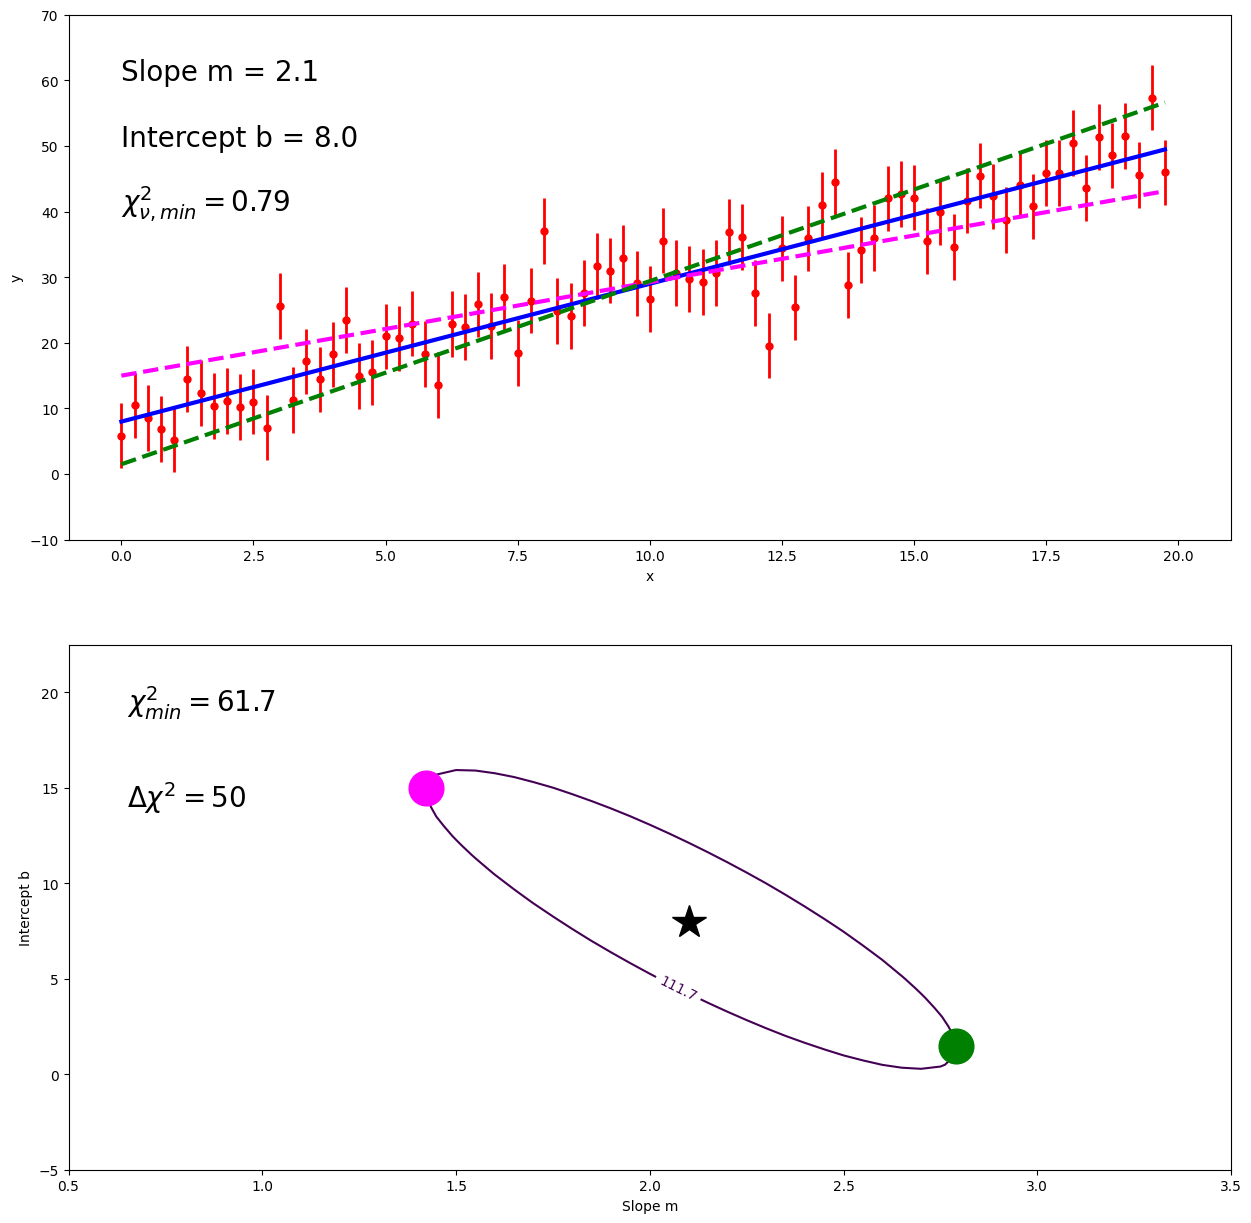

In [16]:
import matplotlib.pyplot as plt
import numpy as np
#

def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2


#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
#x = np.arange(-5.0, 15.0, 0.25)
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-2.0 #the number of degrees of freedom; M = 2 -- slope and intercept


#now we create a grid of slopes and intercepts and calculate chi-squared for each of them
slopes = np.arange(1.0, 3.01, 0.05) #the grid of slopes we're going to test
intercepts = np.arange(-5.0, 25.01, 0.5) #the grid of slopes we're going to test
slopes_grid, intercepts_grid = np.meshgrid(slopes, intercepts, indexing='xy')
#note that the indexing scheme used here is different from that in the last session's
#use of meshgrid, since plt.contour() requires 'xy' style indexing...

chi2 = 1.e5 + slopes_grid*0.0  #setting up the grid of chisquareds  
redc2 = 1.e5 + slopes_grid*0.0 #setting up the grid of chisquareds  
colorscale = slopes_grid*0.0 #setting up the grid of colors
best_slope = 1.e5 
best_chi2 = 1.e5
best_redc2 = 1.e5
i = 0
for m in slopes:
    j = 0
    for b in intercepts:
        y_test = m*x + b
        chi2[j, i] = chisq(y, sig_y, y_test)
        redc2[j, i] = chi2[j, i]/(x.size-2.0)
        if (chi2[j, i] < best_chi2):
            best_chi2 = chi2[j, i]
            best_redc2 = redc2[j, i]
            best_slope = m
            best_intercept = b
        j = j+1
    i = i+1


    
#first plot the chisq contours in slope vs intercept    
plt.subplot(2,1,2)
plt.xlabel('Slope m')
plt.ylabel('Intercept b')
plt.plot(best_slope, best_intercept, color='black', marker="*", markersize=25)
plt.axis([0.5, 3.5, -5, 22.5])
#define the z-level we want to place our contour at
delta_chi2 = 50
levs = [best_chi2 + delta_chi2]
#plot the contours:
cs = plt.contour(slopes, intercepts, chi2, levels=levs) #plot contours at given levels
#label the contours
plt.clabel(cs, inline=1,fmt='%5.1f') 
#
c2string = r'$\chi^2_{min} =$' +  str(np.round(best_chi2, 1))
plt.text(0.65, 19., c2string, fontsize=20)
dc2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2, 0))
plt.text(0.65, 14.0, dc2string, fontsize=20)



#The following code may look complicated -- don't worry about this! It's just because I'm trying to make nice plots
#that illustrate difficult concepts. This is not required for the sort of analysis you'd normally do! You 
#do not have to be able to replicate this!
#
#
#Here is a little trick to extract the x,y coordinates 
#of the actual contour line plotted
v = cs.collections[0].get_paths()[0].vertices
xtest = v[:,0]
ytest = v[:,1]
#if you want to test this out, try plotting these directly
#plt.plot(xtest, ytest, color='green', marker="o", markersize=3)
#
#let's get a couple of "extreme" points on the contour
#we'll take the two points with the most extreme slopes (and the corresponding
#intercepts, of course)
sort_index = np.argsort(xtest)
slope_test1 = xtest[sort_index[0]]
intercept_test1 = ytest[sort_index[0]]
slope_test2 = xtest[sort_index[-1]]
intercept_test2 = ytest[sort_index[-1]]
plt.plot(slope_test1, intercept_test1, color='magenta', marker="o", markersize=25)
plt.plot(slope_test2, intercept_test2, color='green', marker="o", markersize=25)


#now plot the best fitting model and the two extreme delta-chisq models
plt.subplot(2,1,1)
y_best = best_slope*x + best_intercept 
y_test1 = slope_test1*x + intercept_test1
y_test2 = slope_test2*x + intercept_test2
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(x, y, yerr=sig_y, color="red", linewidth=2, linestyle="None")
plt.plot(x, y_best, color='blue', marker="None", linewidth=3, linestyle="-")
plt.plot(x, y_test1, color='magenta', marker="None", linewidth=3, linestyle="dashed")
plt.plot(x, y_test2, color='green', marker="None", linewidth=3, linestyle="dashed")
#
c2string = r'$\chi_{\nu,min}^2 =$' +  str(np.round(best_redc2, 2))
plt.text(0.0, 40, c2string, fontsize=20)
sstring = 'Slope m = ' +  str(np.round(best_slope, 2))
plt.text(0.0, 60, sstring, fontsize=20)
istring = 'Intercept b = ' +  str(np.round(best_intercept, 2))
plt.text(0.0, 50, istring, fontsize=20)
plt.axis([-1, 21, -10, 70])


plt.show()

Here again, the two models selected on the basis of their identical $\chi^2$ look visually very similar in terms of their goodness-of-fit, as we'd hope and expect.

### Assigning a specific confidence *level* to a specific $\Delta\chi^2$

All of the above hopefully makes intuitive sense, but it doesn't tell us **what** confidence level a particular contour corresponds to!

Well, this is where the theoretical magic happens! However, as always in this course, we will draw a veil over the mathematics involved in proving the following statements. The derivation is not particularly illuminating and certainly not essential for correctly using the method. Should you ever feel the burning desire to see the derivation, I recommend a Chapter 15.6 of the famous *Numerical Recipes* book we've already mentioned several times in this course.

#### Models with a single adjustable ("free") parameter

If our model has only 1 free parameter, $a$:
<br>
* the 1-$\sigma$ confidence interval for $a$ corresponds to $\Delta\chi^2 = 1$
* the 2-$\sigma$ confidence interval for $a$ corresponds to $\Delta\chi^2 = 4$
* the 3-$\sigma$ confidence interval for $a$ corresponds to $\Delta\chi^2 = 9$
<br><br>
* by "1-$\sigma$", "2-$\sigma$", "3-$\sigma$", we specifically mean 68.3%, 95.4% and 99.73% confidence intervals

The best way to understand how this works is, as usual, by looking at an example. So let's again consider our trusty 1-D example from above.

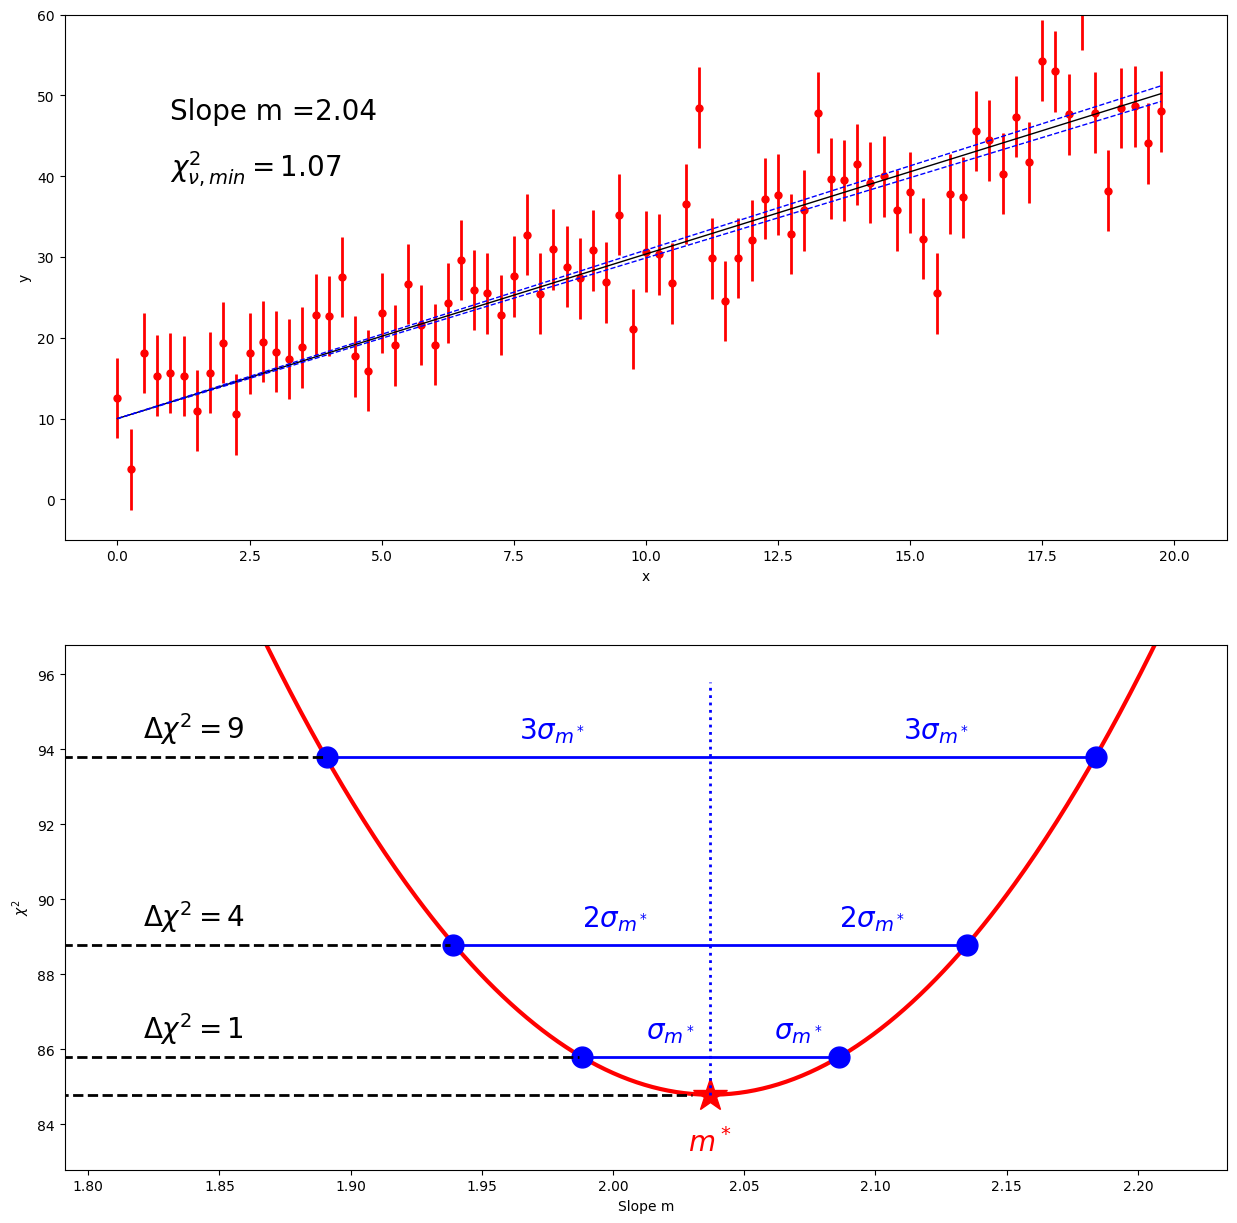

Best-fitting slope =  2.0369999999999626  +/-  0.048999999999994714
Corresponding Chi^2 =  84.79383278497257
Corresponding Reduced Chi^2 = 1.0733396555059818


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2


#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-1.0 #the number of degrees of freedom; M = 1 -- slope


#now we create a grid of slopes and calculate chi-squared for each of them
slopes = np.arange(1.7, 2.3, 0.001) #the grid of slopes we're going to test
chi2 = 1.e5 + slopes*0.0 #setting up the grid of chisquareds  
best_slope = 1.e5 
best_chi2 = 1.e5
i = 0
for m in slopes:
    y_test = m*x + intercept
    chi2[i] = chisq(y, sig_y, y_test)
    if (chi2[i] < best_chi2):
        best_chi2 = chi2[i]
        best_slope = m
    i = i + 1
        
plt.subplot(2,1,2)
plt.xlabel('Slope m')
plt.ylabel(r'$\chi^2$')
plt.plot(slopes, chi2, color='red', marker="None", linewidth=3, linestyle="-")
plt.plot(best_slope, best_chi2, color='red', marker="*", markersize=25)

#
#draw a horizontal line across the plot a chisq_min
slopes_plot = np.arange(-1, best_slope, 0.01)
chi2_ref_plot = best_chi2 + 0.0*slopes_plot
plt.plot(slopes_plot, chi2_ref_plot, color='black', marker='None', linewidth=2, linestyle='--')



#the following code is not particularly pretty, but I've intentionally left it like this, 
#so that it is a trivial and obvious extension of the code directly above. 
#
#Note again that, if this looks complicated, it's just because I'm trying to make nice plots
#that illustrate difficult concepts. This is not required for the sort of analysis you'd normally do!
#
#
delta_chi2_1 = 1
delta_chi2_2 = 4
delta_chi2_3 = 9
#now find the intersection points with our chisq vs slope curve
#we'll do this in a noddy way: we work out the difference between
#our adopted constant value and curve at each slope. The two 
#slopes with the lowest absolute values of these differences must then be 
#the closest points on our grid to the intercepts
chi2_ref_1 = best_chi2 + delta_chi2_1 + 0.0*slopes
chi2_ref_2 = best_chi2 + delta_chi2_2 + 0.0*slopes
chi2_ref_3 = best_chi2 + delta_chi2_3 + 0.0*slopes
#
absdiff_1 = np.absolute(chi2_ref_1-chi2)
absdiff_2 = np.absolute(chi2_ref_2-chi2)
absdiff_3 = np.absolute(chi2_ref_3-chi2)
#
sort_index_1 = np.argsort(absdiff_1)
sort_index_2 = np.argsort(absdiff_2)
sort_index_3 = np.argsort(absdiff_3)
#
test_slope1_1 = slopes[sort_index_1[0]]
test_slope2_1 = slopes[sort_index_1[1]]
test_slope1_2 = slopes[sort_index_2[0]]
test_slope2_2 = slopes[sort_index_2[1]]
test_slope1_3 = slopes[sort_index_3[0]]
test_slope2_3 = slopes[sort_index_3[1]]
#
#these test slopes may not yet be order correctly (i.e. 
#test_slope1_1 could be bigger than test_slope2_1, for example)
#let's sort them
if (test_slope1_1 > test_slope2_1):
    temp = test_slope1_1
    test_slope1_1 = test_slope2_1
    test_slope2_1 = temp
if (test_slope1_2 > test_slope2_2):
    temp = test_slope1_2
    test_slope1_2 = test_slope2_2
    test_slope2_2 = temp
if (test_slope1_3 > test_slope2_3):
    temp = test_slope1_3
    test_slope1_3 = test_slope2_3
    test_slope2_3 = temp
#
test_chi2_ref_1 = best_chi2 + delta_chi2_1 
test_chi2_ref_2 = best_chi2 + delta_chi2_2 
test_chi2_ref_3 = best_chi2 + delta_chi2_3 
#
plt.plot(test_slope1_1, test_chi2_ref_1, color='blue', marker="o", markersize=15)
plt.plot(test_slope2_1, test_chi2_ref_1, color='blue', marker="o", markersize=15)
c2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2_1, 0))
xpos = test_slope1_3-0.07
ypos = best_chi2+delta_chi2_1+0.5
plt.text(xpos, ypos, c2string, fontsize=20)
#
plt.plot(test_slope1_2, test_chi2_ref_2, color='blue', marker="o", markersize=15)
plt.plot(test_slope2_2, test_chi2_ref_2, color='blue', marker="o", markersize=15)
c2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2_2, 0))
ypos = best_chi2+delta_chi2_2+0.5
plt.text(xpos, ypos, c2string, fontsize=20)
#
plt.plot(test_slope1_3, test_chi2_ref_3, color='blue', marker="o", markersize=15)
plt.plot(test_slope2_3, test_chi2_ref_3, color='blue', marker="o", markersize=15)
c2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2_3, 0))
ypos = best_chi2+delta_chi2_3+0.5
plt.text(xpos, ypos, c2string, fontsize=20)
#
#draw horizontal lines across chi2 vs slope at our delta_chisq
slopes_plot_1 = np.arange(-1, test_slope1_1, 0.001)
slopes_plot_2 = np.arange(-1, test_slope1_2, 0.001)
slopes_plot_3 = np.arange(-1, test_slope1_3, 0.001)
chi2_ref_plot_1 = best_chi2 + delta_chi2_1 + 0.0*slopes_plot_1
chi2_ref_plot_2 = best_chi2 + delta_chi2_2 + 0.0*slopes_plot_2
chi2_ref_plot_3 = best_chi2 + delta_chi2_3 + 0.0*slopes_plot_3
plt.plot(slopes_plot_1, chi2_ref_plot_1, color='black', marker='None', linewidth=2, linestyle='--')
plt.plot(slopes_plot_2, chi2_ref_plot_2, color='black', marker='None', linewidth=2, linestyle='--')
plt.plot(slopes_plot_3, chi2_ref_plot_3, color='black', marker='None', linewidth=2, linestyle='--')
#
#mark the confidence intervals
slopes_plot_1 = np.arange(test_slope1_1, test_slope2_1, 0.001)
slopes_plot_2 = np.arange(test_slope1_2, test_slope2_2, 0.001)
slopes_plot_3 = np.arange(test_slope1_3, test_slope2_3, 0.001)
chi2_ref_plot_1 = best_chi2 + delta_chi2_1 + 0.0*slopes_plot_1
chi2_ref_plot_2 = best_chi2 + delta_chi2_2 + 0.0*slopes_plot_2
chi2_ref_plot_3 = best_chi2 + delta_chi2_3 + 0.0*slopes_plot_3
plt.plot(slopes_plot_1, chi2_ref_plot_1, color='blue', marker='None', linewidth=2, linestyle='-')
plt.plot(slopes_plot_2, chi2_ref_plot_2, color='blue', marker='None', linewidth=2, linestyle='-')
plt.plot(slopes_plot_3, chi2_ref_plot_3, color='blue', marker='None', linewidth=2, linestyle='-')
#
#mark the best slope as a vertical line
plt.plot([best_slope, best_slope], [best_chi2, best_chi2 + delta_chi2_3 + 2], 
         color='blue', marker='None', linewidth=2, linestyle='dotted')
#label some stuff
sigstring = r'$\sigma_{m^*}$'
xpos = 0.5*(best_slope+test_slope1_1)
ypos = best_chi2+delta_chi2_1+0.5
plt.text(xpos, ypos, sigstring, fontsize=20,color='blue')
xpos = 0.5*(best_slope+test_slope2_1)
ypos = best_chi2+delta_chi2_1+0.5
plt.text(xpos, ypos, sigstring, fontsize=20,color='blue')
#
sigstring = r'2$\sigma_{m^*}$'
xpos = 0.5*(best_slope+test_slope1_2)
ypos = best_chi2+delta_chi2_2+0.5
plt.text(xpos, ypos, sigstring, fontsize=20,color='blue')
xpos = 0.5*(best_slope+test_slope2_2)
ypos = best_chi2+delta_chi2_2+0.5
plt.text(xpos, ypos, sigstring, fontsize=20,color='blue')
#
sigstring = r'3$\sigma_{m^*}$'
xpos = 0.5*(best_slope+test_slope1_3)
ypos = best_chi2+delta_chi2_3+0.5
plt.text(xpos, ypos, sigstring, fontsize=20,color='blue')
xpos = 0.5*(best_slope+test_slope2_3)
ypos = best_chi2+delta_chi2_3+0.5
plt.text(xpos, ypos, sigstring, fontsize=20,color='blue')
#
mstring = r'$m^*$'
xpos = best_slope
ypos = best_chi2-1.5
plt.text(xpos, ypos, mstring, fontsize=20, 
         horizontalalignment='center', color='red')
#
plt.axis([test_slope1_3-0.1, test_slope2_3+0.05, best_chi2-2, best_chi2+12])



###Now plot the actual fit...


plt.subplot(2,1,1)
y_best = best_slope*x + intercept 
y_test1 = test_slope1_1*x + intercept
y_test2 = test_slope2_1*x + intercept
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(x, y, yerr=sig_y, color="red", linewidth=2, linestyle="None")
plt.plot(x, y_best, color='black', marker="None", linewidth=1, linestyle="-")
plt.plot(x, y_test1, color='blue', marker="None", linewidth=1, linestyle="dashed")
plt.plot(x, y_test2, color='blue', marker="None", linewidth=1, linestyle="dashed")
c2string = r'$\chi_{\nu,min}^2 =$' +  str(np.round(best_chi2/(x.size-1.0), 2))
plt.text(1.0, 40, c2string, fontsize=20)
sstring = 'Slope m =' +  str(np.round(best_slope, 2))
plt.text(1.0, 47, sstring, fontsize=20)
plt.axis([-1, 21, -5, 60])
plt.show()

#we now get the 1-sigma error on the slope 
#we have two estimates that should be the same, but may be
#slightly different due to numerical inaccuracies 
#(e.g. due to our grid stepping); so we simply average them
err_slope1 = (best_slope - test_slope1_1)
err_slope2 = (test_slope2_1 - best_slope)
err_slope = 0.5*(err_slope1 + err_slope2)
print('Best-fitting slope = ', best_slope, ' +/- ',err_slope)
print('Corresponding Chi^2 = ', best_chi2)
print('Corresponding Reduced Chi^2 =', best_chi2/dof)

Hopefully the plot produced by this script is self-explanatory and illustrates clearly how we can use our $\chi^2(m)$ curve (where $m$ is the slope) to obtain not just an optimal estimate $m^*$, but also estimates for its uncertainty.

Perhaps the most surprising thing to almost everybody who first encounters a plot like that above is how **small** the errors seem to be.

For example, it may seem hard to believe that the lines overplotted on the data in the top plot really correspond to the 68% confidence limits on this particular model.

However, while it may be counterintuitive, it is nevertheless correct! 

If we think about this, we probably **should** expect that our single model parameter will be very well constrained. Sure, the sizes of the *individual* error bars are quite large. But on the other hand we are using $N = 80$ data points to constrain a single parameter!

This is all well and good, but let's test if this prescription really gives correct confidence intervals by carrying out a simulation. This will also give us a bit more intuition about how the whole thing works.

##### Example: Testing the $\Delta\chi^2$ confidence intervals for a single free parameter

We'll carry out 10,000 simulations in which we derive 1-$\sigma$, 2-$\sigma$ and 3-$\sigma$ confidence intervals for our slope fitting example exactly as above. In each simulation, we'll then check whether our interval included or did not include the correct slope. Finally, we'll report the fraction for each.

     [animation 1 -- download code from Blackboard]

So this really, genuinely works! However, let's remember that it *only* works under a set of assumptions that we haven't spelled out yet. We'll do that shortly, but, for now, let's get back to what our analytic approach is able to tell us.

#### Models with $M$ adjustable ("free") parameters

If our model has more than one free parameter, we can still use contours of constant $\chi^2$ as confidenece regions. And we can even still use $\Delta\chi^2 = 1, 4, 9$ to find 1-$\sigma$, 2-\$\sigma$ and 3-$\sigma$ confidence intervals -- **as long as we understand that these will be confidence intervals on "one parameter at a time"**.

Let's see what that means, using our old friend -- the 2-D straight line fit -- as an example.

First, let's just plot the 2-D $\chi^2$ contours for this case.

/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/1079585534.py:93: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  v = cs.collections[0].get_paths()[0].vertices


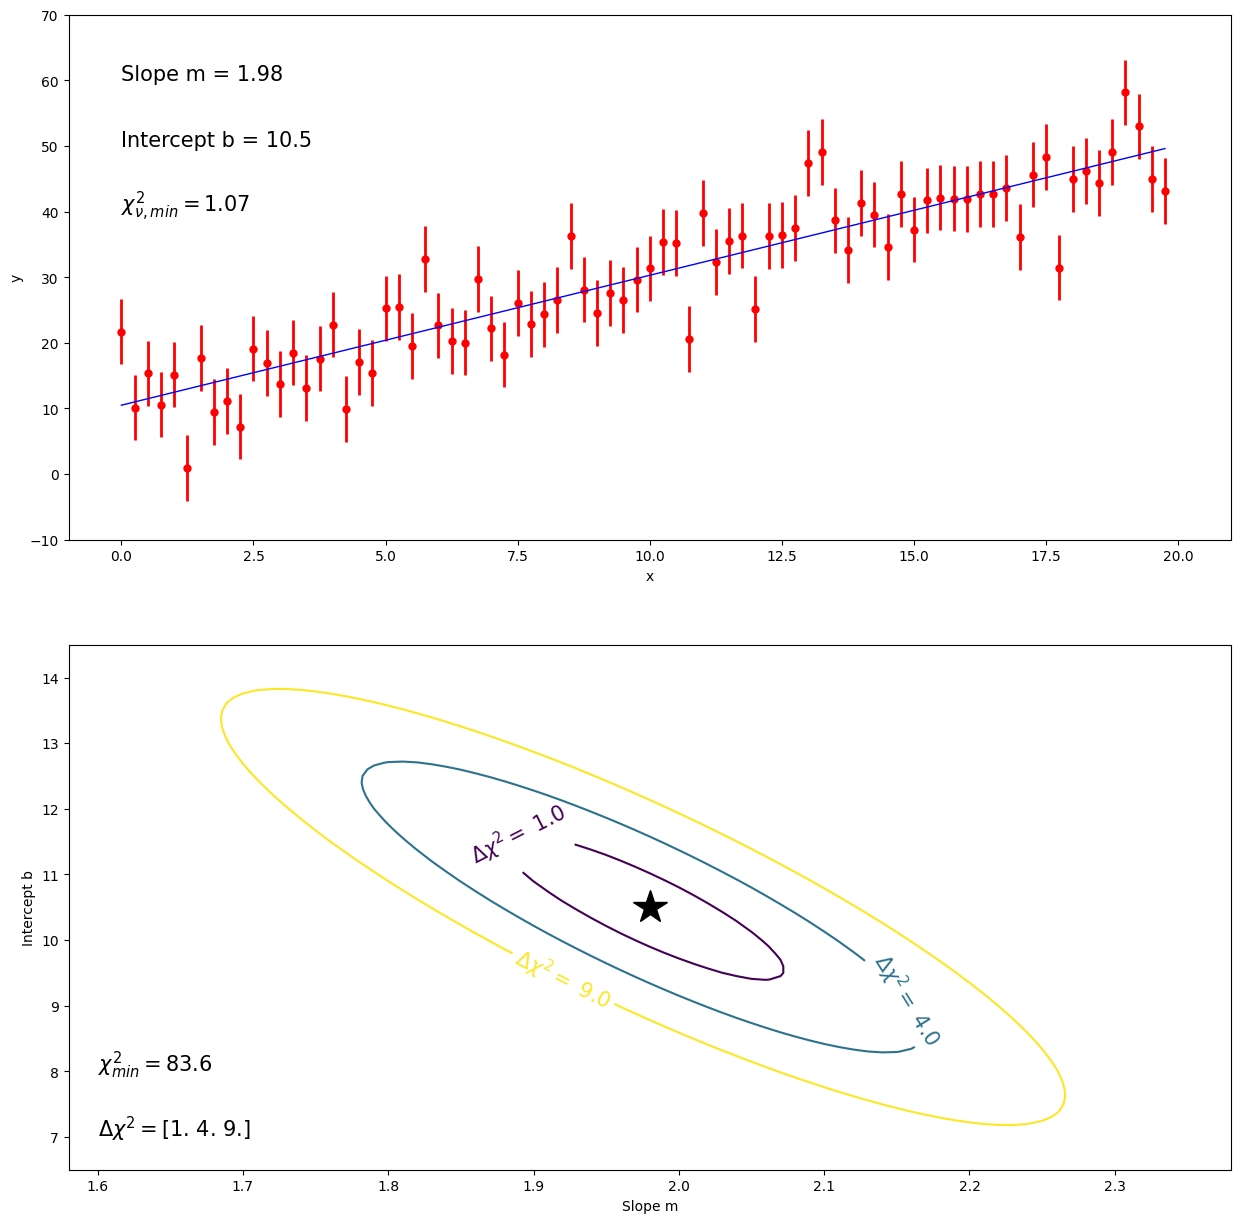

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2


#set up the fake data
slope = 2.0
intercept = 10
sigma = 5.0
x = np.arange(0.0, 20.0, 0.25)
#x = np.arange(-40.0, -20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-2.0 #the number of degrees of freedom; M = 2 -- slope and intercept


#now we create a grid of slopes and intercepts and calculate chi-squared for each of them
slopes = np.arange(1.5, 2.51, 0.01) #the grid of slopes we're going to test
intercepts = np.arange(5.0, 15.01, 0.1) #the grid of slopes we're going to test
slopes_grid, intercepts_grid = np.meshgrid(slopes, intercepts, indexing='xy')
#note that the indexing scheme used here is different from that in the last session's
#use of meshgrid, since plt.contour() requires 'xy' style indexing...

chi2 = 1.e5 + slopes_grid*0.0  #setting up the grid of chisquareds  
redc2 = 1.e5 + slopes_grid*0.0 #setting up the grid of chisquareds  
colorscale = slopes_grid*0.0 #setting up the grid of colors
best_slope = 1.e5 
best_chi2 = 1.e5
best_redc2 = 1.e5
i = 0
for m in slopes:
    j = 0
    for b in intercepts:
        y_test = m*x + b
        chi2[j, i] = chisq(y, sig_y, y_test)
        redc2[j, i] = chi2[j, i]/(x.size-2.0)
        if (chi2[j, i] < best_chi2):
            best_chi2 = chi2[j, i]
            best_redc2 = redc2[j, i]
            best_slope = m
            best_intercept = b
        j = j+1
    i = i+1

#first plot the chisq contours in slope vs intercept    
plt.subplot(2,1,2)
plt.xlabel('Slope m')
plt.ylabel('Intercept b')
plt.plot(best_slope, best_intercept, color='black', marker="*", markersize=25)
xmin = best_slope - 0.4
xmax = best_slope + 0.4
ymin = best_intercept - 4
ymax = best_intercept + 4
plt.axis([xmin, xmax, ymin, ymax])

#define the z-level we want to place our contour at
delta_chi2 = [1.0, 4.0, 9.0]
levs = best_chi2 + delta_chi2
levf = [best_chi2, best_chi2+delta_chi2[0]]

#plot the contours:
cs = plt.contour(slopes, intercepts, chi2, levels=levs) #plot contours at given levels

#label the contours
#I'm being fancy here and am using the fmt "dictionary" to make labels
#in delta-chisq; this is only to make a nice plot for illustration purposes...
#don't worry about this for your own work!
fmt = {}
fmt[levs[0]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[0])
fmt[levs[1]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[1])
fmt[levs[2]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[2])
plt.clabel(cs, inline=1,fmt=fmt,fontsize=15) 
#plt.clabel(cs, inline=1,fmt='%5.1f') 
#
c2string = r'$\chi^2_{min} =$' +  str(np.round(best_chi2, 1))
plt.text(xmin+0.02, ymin+1.5, c2string, fontsize=15)
dc2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2, 2))
plt.text(xmin+0.02, ymin+0.5, dc2string, fontsize=15)
#

#here is a little trick to extract the x,y coordinates 
#of the actual contour line plotted
#again, this is not something you would need to worry about in your work!
v = cs.collections[0].get_paths()[0].vertices
xtest = v[:,0]
ytest = v[:,1]
#if you want to test this out, try plotting these directly
#plt.plot(xtest, ytest, color='green', marker="o", markersize=3)



#now plot the best fitting model and the two extreme delta-chisq models
plt.subplot(2,1,1)
y_best = best_slope*x + best_intercept 
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(x, y, yerr=sig_y, color="red", linewidth=2, linestyle="None")
plt.plot(x, y_best, color='blue', marker="None", linewidth=1, linestyle="-")
#
c2string = r'$\chi_{\nu,min}^2 =$' +  str(np.round(best_redc2, 2))
plt.text(0.0, 40, c2string, fontsize=15)
sstring = 'Slope m = ' +  str(np.round(best_slope, 2))
plt.text(0.0, 60, sstring, fontsize=15)
istring = 'Intercept b = ' +  str(np.round(best_intercept, 2))
plt.text(0.0, 50, istring, fontsize=15)
plt.axis([-1, 21, -10, 70])


plt.show()

Now the important point to understand is that **these ellipses do NOT "contain" 68%, 95% and 99.7% confidence**.


Let's drive this point home a little more forcefully:

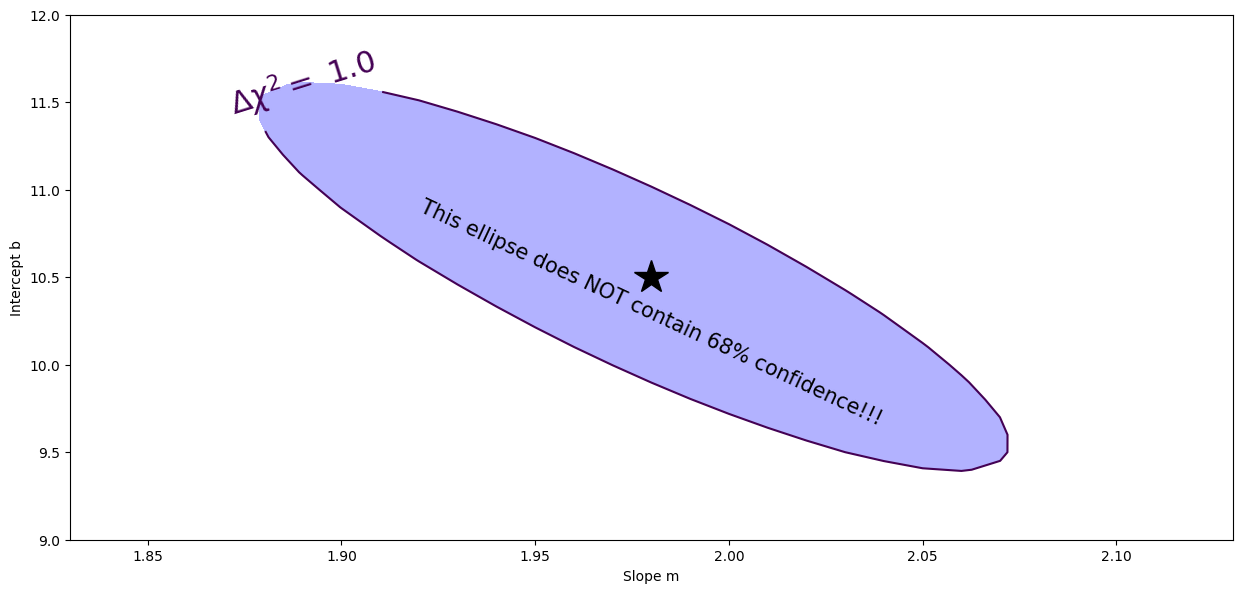

In [19]:
#first plot the chisq contours in slope vs intercept    
plt.subplot(2,1,2)
plt.xlabel('Slope m')
plt.ylabel('Intercept b')
plt.plot(best_slope, best_intercept, color='black', marker="*", markersize=25)
plt.text(best_slope, best_intercept-0.2, 'This ellipse does NOT contain 68% confidence!!!', \
         ha='center', va='center', fontsize=15, rotation=-25)
xmin = best_slope - 0.15
xmax = best_slope + 0.15
ymin = best_intercept - 1.5
ymax = best_intercept + 1.5
plt.axis([xmin, xmax, ymin, ymax])

#define the z-level we want to place our contour at
delta_chi2 = [1.00]
levs = best_chi2 + delta_chi2
levf = [best_chi2, best_chi2+delta_chi2[0]]
#plot the contours:
cs = plt.contour(slopes, intercepts, chi2, levels=levs) #plot contours at given levels
cf = plt.contourf(slopes, intercepts, chi2, levels=levf, alpha=0.3, colors='blue') #fill the 1-sigma contour 
#label the contours
#I'm being fancy here and am using the fmt "dictionary" to make labels
#in delta-chisq; this is only to make a nice plot for illustration purposes...
fmt = {}
plt.rcParams.update({'font.size': 35})
fmt[levs[0]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[0])
plt.rcParams.update({'font.size': 22})
plt.clabel(cs, inline=1,fmt=fmt) 
plt.show()

**Again: once we are dealing with $M > 1$ adjustable model parameters, a contour drawn at $\Delta\chi^2 = 1$ does NOT "contain" 68% confidence.**

It **is** possible to define such an ellipse -- it just corresponds to different levels of $\Delta\chi^2$, depending on how many parameters our model has. But we are not going to get into this for this module, because it's a little advanced and not really necessary for what we need.

OK, but if that ellipse is **NOT** a 1-$\sigma$ confidence interval -- well, what is it? 

And, more importantly, **how do we actually get the 1-$\sigma$ confidence intervals on our parameters?**

The best way to illustrate the answers to these questions is with a plot!

(NOTE: Please do **NOT** worry about the use of np.meshgrid here or the fancy plotting -- none of this is required in your own code. I just wanted to make sure the resulting plot looks really good!)

/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/262175312.py:95: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  v = cs.collections[0].get_paths()[0].vertices


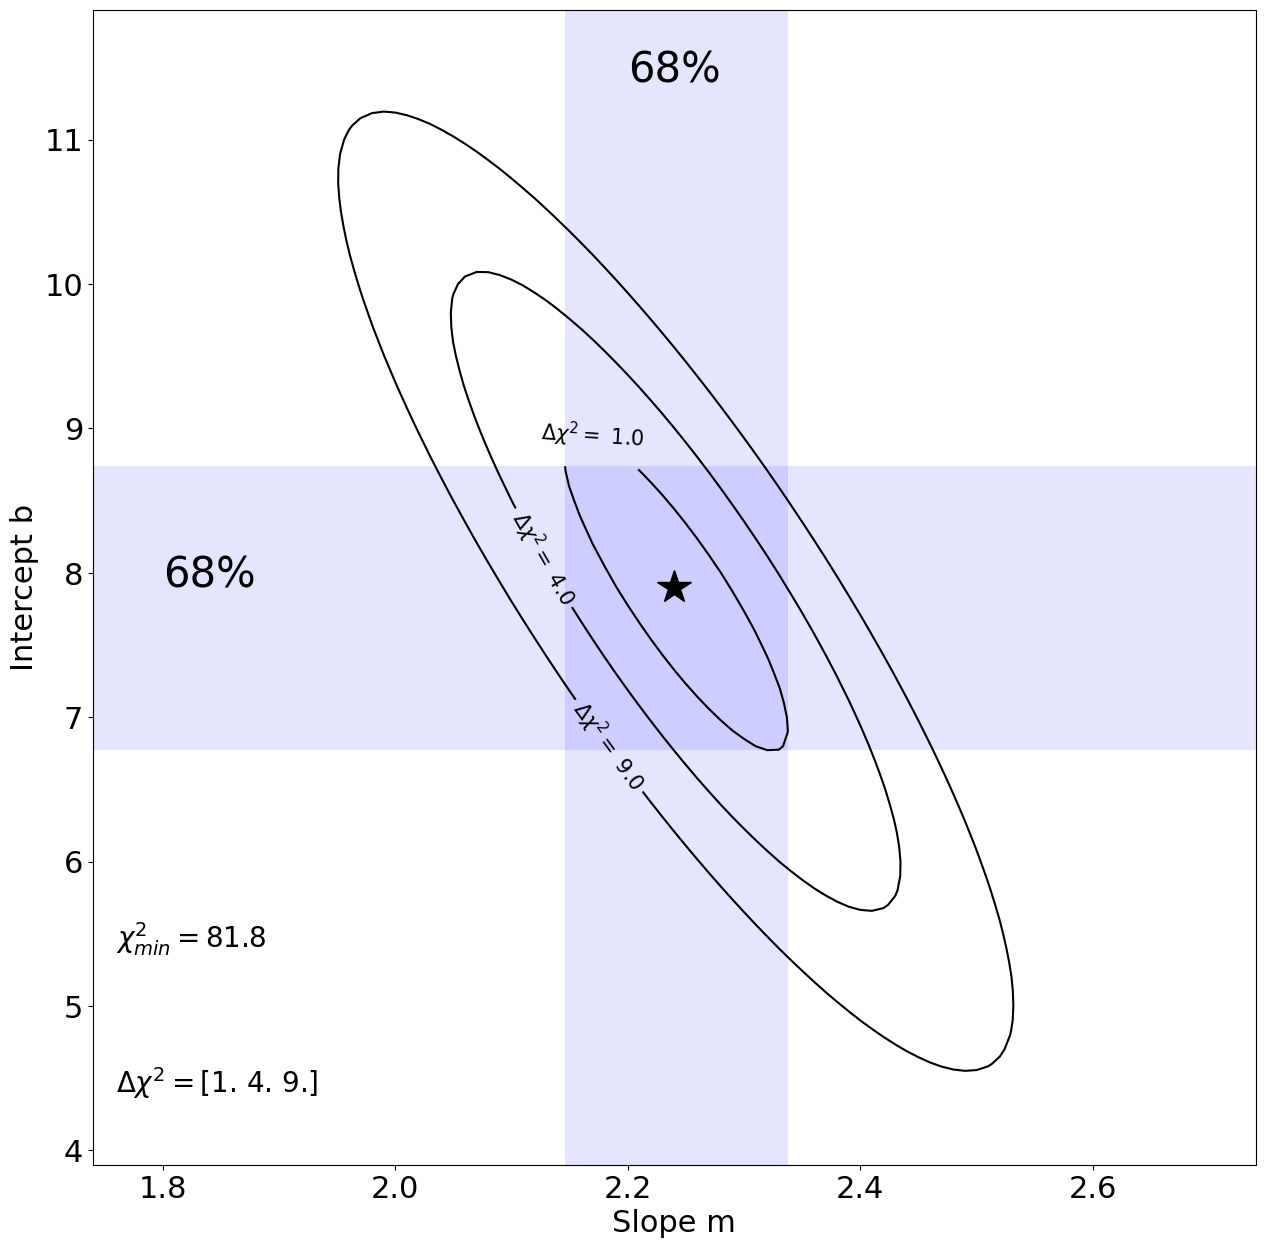

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2


#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
#x = np.arange(-5.0, 15.0, 0.25)
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-2.0 #the number of degrees of freedom; M = 2 -- slope and intercept


#now we create a grid of slopes and intercepts and calculate chi-squared for each of them
slopes = np.arange(1.0, 3.01, 0.01) #the grid of slopes we're going to test
intercepts = np.arange(0.0, 20.01, 0.1) #the grid of slopes we're going to test
slopes_grid, intercepts_grid = np.meshgrid(slopes, intercepts, indexing='xy')
#note that the indexing scheme used here is different from that in the last session's
#use of meshgrid, since plt.contour() requires 'xy' style indexing...
#don't worry about this though -- you do NOT need to do any of this in your own code!

chi2 = 1.e5 + slopes_grid*0.0  #setting up the grid of chisquareds  
redc2 = 1.e5 + slopes_grid*0.0 #setting up the grid of chisquareds  
colorscale = slopes_grid*0.0 #setting up the grid of colors
best_slope = 1.e5 
best_chi2 = 1.e5
best_redc2 = 1.e5
i = 0
for m in slopes:
    j = 0
    for b in intercepts:
        y_test = m*x + b
        chi2[j, i] = chisq(y, sig_y, y_test)
        redc2[j, i] = chi2[j, i]/(x.size-2.0)
        if (chi2[j, i] < best_chi2):
            best_chi2 = chi2[j, i]
            best_redc2 = redc2[j, i]
            best_slope = m
            best_intercept = b
        j = j+1
    i = i+1

#first plot the chisq contours in slope vs intercept    
plt.xlabel('Slope m')
plt.ylabel('Intercept b')
plt.plot(best_slope, best_intercept, color='black', marker="*", markersize=25)
xmin = best_slope - 0.5
xmax = best_slope + 0.5
ymin = best_intercept - 4
ymax = best_intercept + 4
plt.axis([xmin, xmax, ymin, ymax])

#define the z-level we want to place our contour at
delta_chi2 = [1.0, 4.0, 9.0]
levs = best_chi2 + delta_chi2
#plot the contours:
cs = plt.contour(slopes, intercepts, chi2, levels=levs, colors='k') #plot contours at given levels
#label the contours
#I'm being fancy here and am using the fmt "dictionary" to make labels
#in delta-chisq; this is only to make a nice plot for illustration purposes...
fmt = {}
fmt[levs[0]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[0])
fmt[levs[1]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[1])
fmt[levs[2]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[2])
plt.clabel(cs, inline=1,fmt=fmt,fontsize=15) 
#plt.clabel(cs, inline=1,fmt='%5.1f') 
#

c2string = r'$\chi^2_{min} =$' +  str(np.round(best_chi2, 1))
plt.text(xmin+0.02, ymin+1.5, c2string, fontsize=20)
dc2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2, 2))
plt.text(xmin+0.02, ymin+0.5, dc2string, fontsize=20)
#


#The following code may look complicated -- don't worry about this! It's just because I'm trying to make nice plots
#that illustrate difficult concepts. This is not required for the sort of analysis you'd normally do! You 
#do not have to be able to replicate this!
#
#
#here is a little trick to extract the x,y coordinates 
#of the actual contour line plotted
v = cs.collections[0].get_paths()[0].vertices
xtest = v[:,0]
ytest = v[:,1]
#if you want to test this out, try plotting these directly
#plt.plot(xtest, ytest, color='green', marker="o", markersize=3)
#
#get the two most extreme slopes on the 1-sigma contour
sort_index = np.argsort(xtest)
slope_test1 = xtest[sort_index[0]]
slope_test2 = xtest[sort_index[-1]]
#get the two most extreme intercepts on the 1-sigma contour
sort_index = np.argsort(ytest)
intercept_test1 = ytest[sort_index[0]]
intercept_test2 = ytest[sort_index[-1]]

x_slope_sig = [slope_test1, slope_test1, slope_test2, slope_test2]
y_slope_sig = [-10, 100, 100, -10]
plt.fill(x_slope_sig, y_slope_sig, 'blue', alpha=0.1)
x_intercept_sig = [-10, 100, 100, -10]
y_intercept_sig = [intercept_test1, intercept_test1, intercept_test2, intercept_test2]
plt.fill(x_intercept_sig, y_intercept_sig, 'blue', alpha=0.1)
plt.text(best_slope, ymax-0.5, '68%', fontsize=30, horizontalalignment='center')
plt.text(xmin+0.1, best_intercept, '68%', fontsize=30, horizontalalignment='center')

plt.show()

(Where the confidence regions hit the axes of the plot, they are of course meant to extend to $\pm \infty$.)

Let's zoom in on the $\Delta\chi^2 = 1$ contour a little more:

<>:65: SyntaxWarning: invalid escape sequence '\i'
<>:71: SyntaxWarning: invalid escape sequence '\i'
<>:65: SyntaxWarning: invalid escape sequence '\i'
<>:71: SyntaxWarning: invalid escape sequence '\i'
/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/1549069468.py:65: SyntaxWarning: invalid escape sequence '\i'
  plt.text(xmin+0.01, best_intercept-0.8, '(i.e. allowing slopes from $-\infty$ to $+\infty$)', \
/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/1549069468.py:71: SyntaxWarning: invalid escape sequence '\i'
  plt.text(best_slope+0.07, ymin+0.2, '(i.e. allowing intercepts from $-\infty$ to $+\infty$)', \
/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/1549069468.py:39: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  v = cs.collections[0].get_paths()[0].vertices


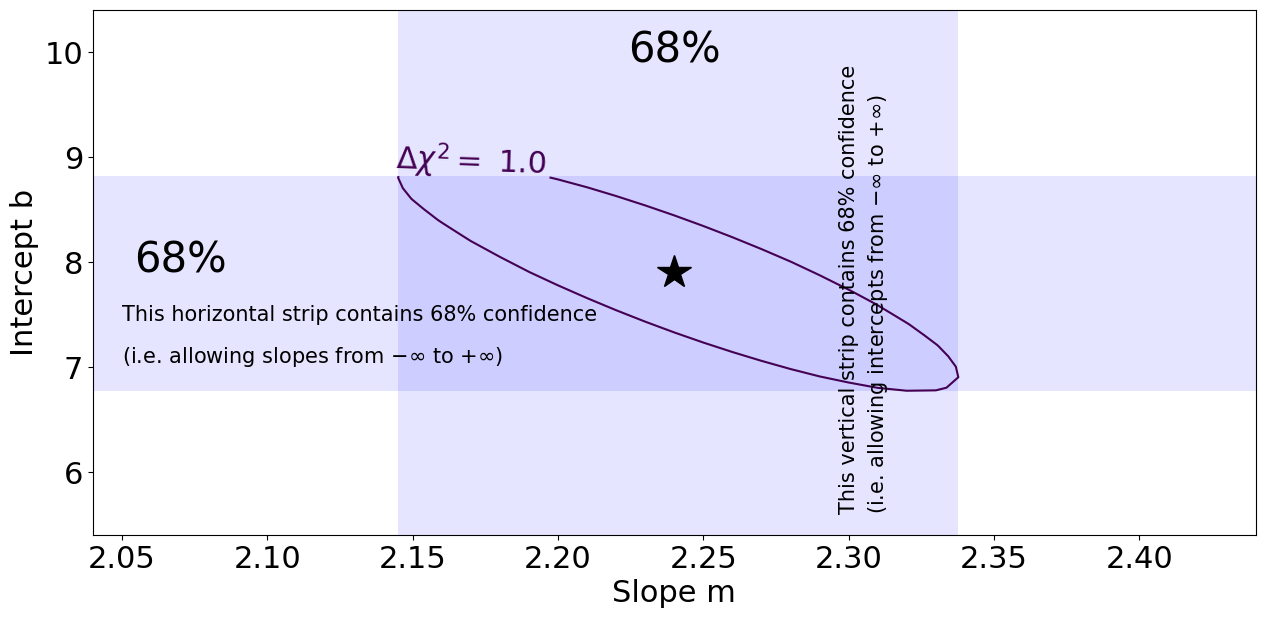

In [21]:
#first plot the chisq contours in slope vs intercept    
plt.subplot(2,1,2)
plt.xlabel('Slope m')
plt.ylabel('Intercept b')
plt.plot(best_slope, best_intercept, color='black', marker="*", markersize=25)



xmin = best_slope - 0.2
xmax = best_slope + 0.2
ymin = best_intercept - 2.5
ymax = best_intercept + 2.5
plt.axis([xmin, xmax, ymin, ymax])

#define the z-level we want to place our contour at
delta_chi2 = [1.0]
levs = best_chi2 + delta_chi2
#plot the contours:
cs = plt.contour(slopes, intercepts, chi2, levels=levs) #plot contours at given levels
#label the contours
#I'm being fancy here and am using the fmt "dictionary" to make labels
#in delta-chisq; this is only to make a nice plot for illustration purposes...
fmt = {}
fmt[levs[0]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[0])
plt.clabel(cs, inline=1,fmt=fmt) 
#plt.clabel(cs, inline=1,fmt='%5.1f') 




#The following code may look complicated -- don't worry about this! It's just because I'm trying to make nice plots
#that illustrate difficult concepts. This is not required for the sort of analysis you'd normally do! You 
#do not have to be able to replicate this!
#
#
#
#here is a little trick to extract the x,y coordinates 
#of the actual contour line plotted
v = cs.collections[0].get_paths()[0].vertices
xtest = v[:,0]
ytest = v[:,1]
#if you want to test this out, try plotting these directly
#plt.plot(xtest, ytest, color='green', marker="o", markersize=3)
#
#get the two most extreme slopes on the 1-sigma contour
sort_index = np.argsort(xtest)
slope_test1 = xtest[sort_index[0]]
slope_test2 = xtest[sort_index[-1]]
#get the two most extreme intercepts on the 1-sigma contour
sort_index = np.argsort(ytest)
intercept_test1 = ytest[sort_index[0]]
intercept_test2 = ytest[sort_index[-1]]

x_slope_sig = [slope_test1, slope_test1, slope_test2, slope_test2]
y_slope_sig = [-10, 100, 100, -10]
plt.fill(x_slope_sig, y_slope_sig, 'blue', alpha=0.1)
x_intercept_sig = [-10, 100, 100, -10]
y_intercept_sig = [intercept_test1, intercept_test1, intercept_test2, intercept_test2]
plt.fill(x_intercept_sig, y_intercept_sig, 'blue', alpha=0.1)
plt.text(best_slope, ymax-0.5, '68%', fontsize=30, horizontalalignment='center')
plt.text(xmin+0.03, best_intercept, '68%', fontsize=30, horizontalalignment='center')

plt.text(xmin+0.01, best_intercept-0.4, 'This horizontal strip contains 68% confidence', \
         ha='left', va='center', fontsize=15)
plt.text(xmin+0.01, best_intercept-0.8, '(i.e. allowing slopes from $-\infty$ to $+\infty$)', \
         ha='left', va='center', fontsize=15)

plt.text(best_slope+0.06, ymin+0.2, 'This vertical strip contains 68% confidence', \
         ha='center', va='bottom', fontsize=15, rotation=90)

plt.text(best_slope+0.07, ymin+0.2, '(i.e. allowing intercepts from $-\infty$ to $+\infty$)', \
         ha='center', va='bottom', fontsize=15, rotation=90)



plt.show()

So it's these horizontal and vertical stripes that contain 68% confidence -- but they apply to "one parameter at a time".

Specifically, our claim is that:

* the horizontal shaded rectangle is a 68% confidence interval for the slope
  * (if the intercept is allowed to take on any value at all)
<br><br>
* the vertical shaded rectangle is a 68% confidence interval for the intercept
  * (if the slope is allowed to take on any value at all)

Incidentally: note that the $\chi^2$ contours are *ellipses*. This will always be true (in 2-D) for models and data sets that satisfy the assumptions which allow us to use a $\Delta\chi^2 = 1$ as a 1-$\sigma$ confidence interval at all.

##### Example: Testing the $\Delta\chi^2$ confidence intervals for a model with two free parameters

Let's check that this works, in exactly the same way as before...

     [animation 2 -- download code from Blackboard]

### $\Delta\chi^2$ in practice: estimating parameter errors via the brute-force gridding method

This is all fine, but how do we actually use any of this in practice?  

In the code that made the plots above, I used some trickery that perhaps made this look complicated -- but that was just because I was trying to make nice-looking educational plots to illustrate difficult concepts. For your own practical applications, it's much simpler.

In this subsection we'll take a look at how this works if we've used brute-force gridding to find our best-fit parameter(s), and in the next section we'll see how we can use curve_fit().

#### A single free parameter

Suppose we have used the brute-force gridding method to fit a straight line with known intercept to a data set. The best-fitting slope -- which produced the lowest $\chi^2 = \chi^2_{min}$ -- was $m^*$. 

Here is a simple way to then use the $\Delta\chi^2 = 1$ method in order to estimate the error on $m^*$:

* we work out $\Delta\chi^2 = \chi^2 - \chi^2_{min}$ for every slope on our grid
<br>

* we loop through the slopes and store the smallest ($m_{low}$) and largest ($m_{high}$) slope for which $\Delta\chi^2 \leq 1$
<br>

* the error on the slope can then be estimated as $\sigma_m \simeq m_{high}-m^* \simeq m^* - m_{low}$
<br>

    * if $m_{high}-m^*$ is very different from $m^* - m_{low}$, our grid must be too coarse

##### Example: The error on the slope of a linear fit with fixed intercept

Let's try and use this simple algorithm to work out the error on the slope we get from a simple straight-line with with fixed intercept.

In [22]:
# first, we set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-1.0 #the number of degrees of freedom; M = 1 -- slope

#now we create a grid of slopes and calculate chi-squared for each of them
slopes = np.arange(0.5, 3.3, 0.01) #the grid of slopes we're going to test
chi2 = 1.e5 + slopes*0.0 #setting up the grid of chisquareds  
best_slope = 1.e5 
best_chi2 = 1.e5
i = 0
for m in slopes:
    y_test = m*x + intercept
    chi2[i] = chisq(y, sig_y, y_test)
    if (chi2[i] < best_chi2):
        best_chi2 = chi2[i]
        best_slope = m
    i = i + 1

    
#now we loop over the slopes again, work out the DeltaChi^2 and
#store the highest and lowest slopes for which DeltaChi^2 <= 1
#
#but first, we have to initialize slope_low and slope_high, our boundaries of the
#confidence contour. We initialize slope_low to a high value and slope_high to a low value
slope_low = best_slope + 100.0
slope_high = best_slope - 100.0
i = 0
for m in slopes:
    if (chi2[i] <= (best_chi2 + 1.0)):
        if (m < slope_low):
            slope_low = m
        if (m > slope_high):
            slope_high = m
    i = i + 1
            
#now we can estimate the error on the slope. We can do this
#from both estimates and compare for a sanity check
slope_err1 = slope_high - best_slope
slope_err2 = best_slope - slope_low

print("Error on slope (estimate 1):", slope_err1)
print("Error on slope (estimate 2):", slope_err2)

#if these are too different from each other for our taste, we should decrease our grid spacing
#(and we should generally adopt the larger value of the two as our "best" estimate)

Error on slope (estimate 1): 0.04999999999999982
Error on slope (estimate 2): 0.040000000000000036


##### Exercise: The error on the slope of a linear fit with fixed intercept

Run the code above with different grid spacing in slope. How coarse can you get before you're no longer comfortable? What is a reasonable way of deciding how fine the spacing needs to be?

##### Exercise: The error on the intercept of a linear fit with fixed slope

Modify the code above so that it works out the error on the intercept of a straight line fit in which the slope is the fixed parameter and the intercept is free.

Try different grid spacings again to see how fine a spacing you need to get a good error estimate.


#### Several free parameters

Suppose we have used the brute-force gridding method to fit a straight line to a data set, $y = m x + b$. This time, both the slope and the intercept were free parameters. The combination of slope and intercept that fit best -- i.e. which produced the lowest $\chi^2 = \chi^2_{min}$ -- was $m^*$ and $b^*$. 

By exact analogy to the 1-parameter case, here is a simple way to then use the $\Delta\chi^2 = 1$ method in order to estimate the errors on $m^*$ and $b^*$:

* we work out $\Delta\chi^2 = \chi^2 - \chi^2_{min}$ *for every combination of slope and intercept on our grid*
<br>

* we now loop through every combination of slope and intercept
    * we store the smallest ($m_{low}$) and largest ($m_{high}$) slope for which $\Delta\chi^2 \leq 1$
    * we store the smallest ($b_{low}$) and largest ($b_{high}$) intercept for which $\Delta\chi^2 \leq 1$
<br>


* the error on the slope can then be estimated as $\sigma_m \simeq m_{high}-m^* \simeq m^* - m_{low}$
  * if $m_{high}-m^*$ is very different from $m^* - m_{low}$, our grid in $m$ must be too coarse
<br>


* the error on the intercept can then be estimated as $\sigma_b \simeq b_{high}-b^* \simeq b^* - b_{low}$    
  * if $b_{high}-b^*$ is very different from $b^* - b_{low}$, our grid in $b$ must be too coarse


##### Example: The error on the slope of a linear fit with free slope and intercept

Let's try and use this simple algorithm to work out the error on the slope and intercept of a simple straight-line fit.

In [23]:
import numpy as np

#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
#x = np.arange(-5.0, 15.0, 0.25)
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-2.0 #the number of degrees of freedom; M = 2 -- slope and intercept


#now we create a grid of slopes and intercepts and calculate chi-squared for each of them

#first, create the 1-D arrays of slopes and intercepts
slopes = np.arange(1.7, 2.31, 0.002) #the grid of slopes we're going to test
intercepts = np.arange(7.0, 13.01, 0.02) #the grid of slopes we're going to test


#now we need to create a *two-dimensional* array for the chi-squared values
#since each pair of slope and intercept produce a different chi-squared
N_slopes = len(slopes)
N_intercepts = len(intercepts)
chi2 = np.zeros((N_slopes, N_intercepts)) + 9e99


best_slope = 1.e5 
best_chi2 = 1.e5

i = 0
for m in slopes:
    
    j = 0
    for b in intercepts:
        
        y_test = m*x + b
        chi2[i, j] = chisq(y, sig_y, y_test)
        
        if (chi2[i, j] < best_chi2):
            best_chi2 = chi2[i, j]
            best_slope = m
            best_intercept = b
            
        j = j+1
        
    i = i+1

    
#now we just loop over the entire 2-D grid again. This time we store the min/max slopes and intercepts for which
#DeltaChi^2 <= 1.
#

#First, we once again initialize our confidence boundaries. As before, we initialize lower boundaries to 
#high value and upper boundaries to low ones. That way they will definitely get changed.
slope_low = best_slope + 100.0
slope_high = best_slope - 100.0
intercept_low = best_intercept + 100.0
intercept_high = best_intercept - 100.0
#
i = 0
for m in slopes:
    j = 0
    for b in intercepts:    
        if (chi2[i, j] <= (best_chi2 + 1.0)):
            if (m < slope_low):
                slope_low = m
            if (m > slope_high):
                slope_high = m 
            if (b < intercept_low):
                intercept_low = b
            if (b > intercept_high):
                intercept_high = b
        j = j+1
    i = i+1

  
            
#now we can estimate the error on the slope. We can do this
#from both estimates and compare for a sanity check
slope_err1 = slope_high - best_slope
slope_err2 = best_slope - slope_low

print("Error on slope (estimate 1):", slope_err1)
print("Error on slope (estimate 2):", slope_err2)

#if these are too different from each other for our taste, we should decrease our grid spacing
#(and we should generally adopt the larger value of the two as our "best" estimate)            

#now we can estimate the error on the intercept. We can do this
#from both estimates and compare for a sanity check

intercept_err1 = intercept_high - best_intercept
intercept_err2 = best_intercept - intercept_low

print("Error on intercept (estimate 1):", intercept_err1)
print("Error on intercept (estimate 2):", intercept_err2)

#if these are too different from each other for our taste, we should decrease our grid spacing
#(and we should generally adopt the larger value of the two as our "best" estimate)


Error on slope (estimate 1): 0.09600000000000009
Error on slope (estimate 2): 0.09600000000000009
Error on intercept (estimate 1): 1.0999999999999766
Error on intercept (estimate 2): 1.0999999999999766


##### Exercise: The error on the slope and intercept of a linear fit

* Spend some time making absolutely sure you understand the code above. 

* Try different values of input slope, input intercept and grid spacings

### $\Delta\chi^2$ in practice: estimating parameter errors with *curve_fit()*

We saw in the previous session how we can also *curve_fit()* -- a numerical $\chi^2$-minimization routine -- to obtain the best-fit parameters. 

Can we also use *curve_fit()* to get errors on the parameters it returns? Yes, we can!

As a reminder, we saw in the last session that *curve_fit()* is designed to be called as follows:

The basic syntax for *curve_fit()* is 

    curve_fit(f, xdata, ydata, sigma, p0, absolute_sigma)


<br><br>

INPUTS:

    f              = the function defining the model we wish to optimize

    xdata          = the data $x_i$ values

    ydata          = the data $y_i$ values

    sigma          = the errors on the $y_i$ values

    p0             = the starting point for the fit

    absolute_sigma = a boolean telling the code how to deal with the errors



<br><br>

RETURN VALUES:

    popt           = the set of parameters corresponding to the minimum chi-squared
    
    pcov           = the covariance matrix of the parameters

Last time, the only output we were concerned with was popt -- the best-fitting parameters.

This time, we're going to see how we can use pcov -- the "covariance matrix" that is also returned automatically by *curve_fit()* -- to estimate parameter uncertainties.

#### Parameter errors from the covariance matrix

The covariance *matrix* is just a set of numbers that characterizes the size and shape of the $\Delta\chi^2 = 1$ error ellipse.

* The diagonal elements tell us the errors on the parameters, taken one at a time (as above)
* The off-diagonal elements tells us whether and how those parameters are correlated.

We will deal with the issue of correlations in a minute, but for now we'll just focus on the parameter errors.

* Let's say we have fit a model with 2 parameters (the extension to $M$ parameters should be obvious)
    * $a_0$ and $a_1$
<br>


* The covariance matrix will then be of dimension $2 \times 2$: 
    * $cov[i,j]$   $\,\,\,\,\,\,\,\,$ where $i = 0,1$ and $j = 0, 1$
<br>


* **The 1-$\sigma$ error on parameter $0$ is then simply given by the square-root of the $0$-th diagonal element:**
    * **$\sigma_{a_0} = \sqrt{cov[0,0]}$**
    
* **The 1-$\sigma$ error on parameter $1$ is then simply given by the square-root of the $1$-st diagonal element:**
    * **$\sigma_{a_1} = \sqrt{cov[1,1]}$**

#### Example: A typical call to *curve_fit()*

So what does this look like in practice? We'll do a comparison to brute-force gridding in a second, but here is just a typical call sequence to curve-fit to get
the best-fitting set of parameters for a fit to x and y:

        def func(x, slope, intercept):
            line = intercept + slope*x
            return line

        ...
        
        best_pars, covar = opt.curve_fit(f=func, xdata=x, ydata=y, 
                                         sigma=sig_y, p0=(start_slope, start_intercept),
                                         absolute_sigma=True)

        ...

        slope_err = np.sqrt(covar[0, 0])
        intercept_err = np.sqrt(covar[1, 1])


Let's use this and see how it compares to our trusty brute-force gridding.

(Note that in order to make the fancy plotting a bit easier, I set up the chi^2 grid using np.meshgrid here. As noted above, this is not something you need to worry about in your own work.)

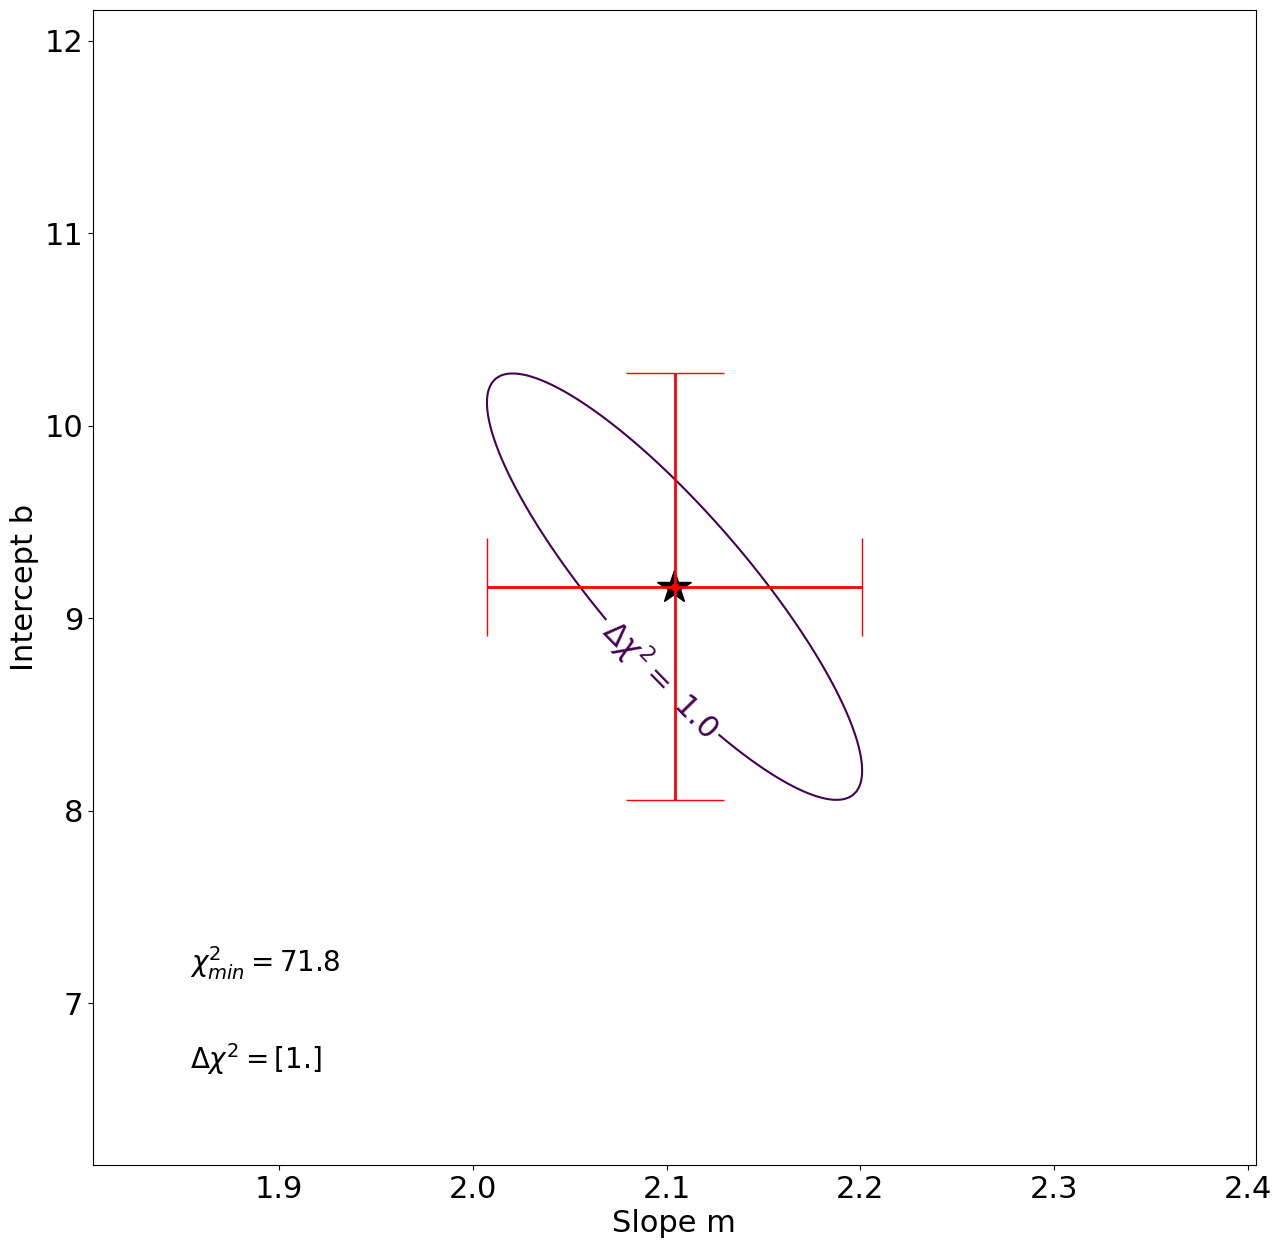

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

def func(x, slope, intercept):
    """calculates the model"""
    line = intercept + slope*x
    return line


def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2


#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
#x = np.arange(-5.0, 15.0, 0.25)
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-2.0 #the number of degrees of freedom; M = 2 -- slope and intercept


#now we create a grid of slopes and intercepts and calculate chi-squared for each of them
slopes = np.arange(1.7, 2.31, 0.002) #the grid of slopes we're going to test
intercepts = np.arange(7.0, 13.01, 0.02) #the grid of slopes we're going to test
slopes_grid, intercepts_grid = np.meshgrid(slopes, intercepts, indexing='xy')
#note that the indexing scheme used here is different from that in the last session's
#use of meshgrid, since plt.contour() requires 'xy' style indexing...

chi2 = 1.e5 + slopes_grid*0.0  #setting up the grid of chisquareds  
redc2 = 1.e5 + slopes_grid*0.0 #setting up the grid of chisquareds  
colorscale = slopes_grid*0.0 #setting up the grid of colors
best_slope = 1.e5 
best_chi2 = 1.e5
best_redc2 = 1.e5
i = 0
for m in slopes:
    j = 0
    for b in intercepts:
        y_test = m*x + b
        chi2[j, i] = chisq(y, sig_y, y_test)
        redc2[j, i] = chi2[j, i]/(x.size-2.0)
        if (chi2[j, i] < best_chi2):
            best_chi2 = chi2[j, i]
            best_redc2 = redc2[j, i]
            best_slope = m
            best_intercept = b
        j = j+1
    i = i+1

#first plot the chisq contours in slope vs intercept    
plt.xlabel('Slope m')
plt.ylabel('Intercept b')
plt.plot(best_slope, best_intercept, color='black', marker="*", markersize=25)
plt.axis([1.7, 2.3, 7, 13])
#define the z-level we want to place our contour at
delta_chi2 = [1.0]
levs = best_chi2 + delta_chi2
#plot the contours:
cs = plt.contour(slopes, intercepts, chi2, levels=levs) #plot contours at given levels
#label the contours
#I'm being fancy here and am using the fmt "dictionary" to make labels
#in delta-chisq; this is only to make a nice plot for illustration purposes...
fmt = {}
fmt[levs[0]] = r'$\Delta\chi^2 =$ ' + str(delta_chi2[0])
plt.clabel(cs, inline=1,fmt=fmt) 
#plt.clabel(cs, inline=1,fmt='%5.1f') 



#now compare to the curve_fit results
start_slope = 5.0 #this is our starting slope for the LM algorithm
start_intercept = -10 #this is our starting intercept for the LM algorithm
best_pars, covar = opt.curve_fit(f=func, xdata=x, ydata=y, 
                                 sigma=sig_y, p0=(start_slope, start_intercept),
                                 absolute_sigma=True)

#get the parameter errors (for 1 parameter at a time)
slope_err = np.sqrt(covar[0, 0])
intercept_err = np.sqrt(covar[1, 1])

#let's quickly work out the min chisq
best_slope2 = best_pars[0]
best_intercept2 = best_pars[1]
y_best2 = func(x, best_slope2, best_intercept2)
best_chi2_2 = np.sum(((y-y_best2)**2.0)/(sig_y**2.0))

#let's plot the best curve_fit solution as a point with error
plt.plot(best_slope2, best_intercept2, marker='o', markersize=5, color='red')
plt.errorbar(best_slope2, best_intercept2, yerr=intercept_err, xerr=slope_err, 
                 color="red", linewidth=2, linestyle="None", capsize=35, capthick=1)


xmin = best_slope - 0.3
xmax = best_slope + 0.3
ymin = best_intercept - 3
ymax = best_intercept + 3
plt.axis([xmin, xmax, ymin, ymax])

#
c2string = r'$\chi^2_{min} =$' +  str(np.round(best_chi2, 1))
plt.text(xmin+0.05, ymin+1.0, c2string, fontsize=20)
dc2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2, 2))
plt.text(xmin+0.05, ymin+0.5, dc2string, fontsize=20)




plt.show()


So *curve_fit()* and our brute-force gridding agree extremely well -- as they should, of course!

### (Removing) correlations between parameter errors

By now, we have plotted a lot of constant $\chi^2$ ellipses for our straight-line model with freely varying slope and intercept. And every single one of them so far has been oriented diagonally!

Why is that? And what does it tell us?

Whenever we fit a data set with a model that has $M > 1$ parameters, there is a possibility that the uncertainties on our best-fitting model will be *correlated*.
<br>
* Physically, this means that the effect of changing one parameter away from its best-fit value can be (partly) compensated for by changing another (correlated) parameter away from *its* best-value.
<br><br>
* Graphically, a correlation between two parameters will produce a *diagonally* oriented confidence contour for these parameters
<br><br>
* Mathematically, a correlation between two parameters implies significantly non-zero values in the corresponding off-diagonal elements in the parameter **covariance (or, equivalently, correlation) matrix**.

We are not going to worry too much about the precise definition of "covariance" here, but it *is* important to have a basic conceptual understanding. Here is the best way I know how to visualize this.

Suppose we have fit a model with two parameters, $a$ and $b$, to a data set.

Our best-fit parameters are $a^*$ and $b^*$.

Now we imagine making $N$ random draws of points from inside our $\Delta\chi^2 = 1$ error ellipse. 

We can then roughly think of the covariance between $a$ and $b$ as being defined by:

$$cov(a,b) = \frac{1}{N} \sum_{i=1}^{N} (a_i - a^*)(b_i - b^*),$$

where $a^*$ and $b^*$ are our best-fit parameters, and the $a_i$ and $b_i$ are random draws from inside our 1-$\sigma$ confidence contour.

(In practice, this is usually not how the covariance matrix is actually calculated, but it is a corrrect way to think about what the covariance matrix actually *is*.)

The covariance **matrix** is just a 2-D array storing the covariances between the various model parameters. The covarivance is often returned as an output parameer by numerical curve fitting functions -- like, for example, *curve_fit()*

For two parameters $a$ and $b$, the covariance matrix would be

\begin{bmatrix}
cov(a,a) = \sigma^2_a & cov(a,b) = cov(b,a) \\
cov(b,a) = cov(a,b) & cov(b,b) = \sigma^2_b
\end{bmatrix}

The covariance tells us whether our parameters tend to vary together: if $a$ increases, does $b$ increase also? (I.e. is the confidence ellipse inclined with a positive slope?)


Similarly, the *correlation matrix* is just a normalized version of the covariance matrix. 

If we divide the covariance between $a$ and $b$ by $\sigma_a \sigma_b$, the result is the *correlation coefficient* between the two parameters. 

The correlation coefficient is just a dimensionless number between -1 (perfectly anti-correlated) and +1 (perfectly correlated). A correlation coefficient of 0 means that there is no correlation at all.

The *correlation matrix* is the 2-D array storing these coefficients. 

 
\begin{bmatrix}
cov(a,a)/\sigma^2_a = 1 & cov(a,b)/(\sigma_a\sigma_b) \\
cov(b,a)/(\sigma_b\sigma_a) & cov(b,b)/\sigma^2_b = 1
\end{bmatrix}

Note that the correlation of a parameter with itself is (obviously) always exactly unity.

All of this can sound terribly confusing at first. But, as usual, things get a lot clearer if we focus on a simple specific example. 

And what example could be simpler or more specific than our usual straight-line model fit!

Let's take another look at one of the first plots we analysed today.

<center>
<img  width=95% height=95% src='contour.png'></img>
</center>

This example actually illustrates the concept of parameter correlations very well:
<br>
* if we *reduce the intercept*, we can *steepen the slope* to ensure the model still goes through the cloud of data points;
<br><br>
* conversely, if we *increase the intercept*, we can *flatten the slope* to ensure the model still goes through the cloud of data points.

So the uncertainties on slope and intercept are *correlated*, because we can trade one off against the other.

What about the correlation matrix? 

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

def func(x, slope, intercept):
    """calculates the model"""
    line = intercept + slope*x
    return line


def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2


#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
#x = np.arange(-5.0, 15.0, 0.25)
x = np.arange(0.0, 20.0, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-2.0 #the number of degrees of freedom; M = 2 -- slope and intercept



#now compare to the curve_fit results
start_slope = 5.0 #this is our starting slope for the LM algorithm
start_intercept = -10 #this is our starting intercept for the LM algorithm
best_pars, covar = opt.curve_fit(f=func, xdata=x, ydata=y, 
                                       sigma=sig_y, p0=(start_slope, start_intercept),
                                       absolute_sigma=True)

#let's convert the covariance matrix to the correlation matrix
#
#first, we get the parameter errors
sig_slope = np.sqrt(covar[0, 0])
sig_intercept = np.sqrt(covar[1, 1])
#
#next, we convert (co)variances to correlations
corr_ss = covar[0, 0]/(sig_slope*sig_slope)
corr_ii = covar[1, 1]/(sig_intercept*sig_intercept)
corr_si = covar[0, 1]/(sig_slope*sig_intercept)
corr_is = covar[1, 0]/(sig_intercept*sig_slope)

print() 
print('       Correlation Matrix')
print('       ==================')
print() 
print('              Slope ', 'Intercept')
print('Slope        ', np.round(corr_ss, 3), ' ', np.round(corr_si,3))
print('Intercept   ', np.round(corr_is, 3),'  ', np.round(corr_ii,3))


       Correlation Matrix

              Slope  Intercept
Slope         1.0   -0.863
Intercept    -0.863    1.0


So yes, the correlation coefficient between slope and intercept is strong and negative, which is exactly what we would expect given our discussion above. (The two quantities are *anti*-correlated because an increase in one is compensated by a decrease in the other.)

#### Reducing or removing correlations

Correlations between model parameters can be annoying:
<br>
* when they exist, we should not really just quote errors on our model parameters, since these do not provide all of the information that is necessary in order to understand the results
<br><br>
* instead, we should also provide the full correlation matrix and/or plot the full set of confidence contours
<br><br>
* **when we derive other quantities from our model parameters, the correlations need to be handled very carefully when propagating errors.**

[Note: I have provided a self-study module discussing the issue of how to propagate errors on model fit parameters.]

In some cases, it is possible to reduce or even remove a correlation between model parameters just by a simple transformation of variables.

The most common case -- and the only one we'll consider here -- is the straight line example we have alread met.

If we once again look back at the figure directly above, we can see that what models that fall along the correlation have in common is that they all cut right through the middle of the cloud of data points. 

In fact, all three of the models shown in the figure predict almost exactly the same $y$ for $x$ values lying near the middle of the data set. 

So if we shifted the $x$ variable such $\overline{x} = 0$, the best intercept for any trial slopes would be virtually the same and would no longer depend on the slope!

Let's check it out!


(Note that in order to make the fancy plotting a bit easier, I set up the $\chi^2$ grid using np.meshgrid here. As noted above, this is not something you need to worry about in your own work.)

/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_1062/108119337.py:82: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  v = cs.collections[0].get_paths()[0].vertices


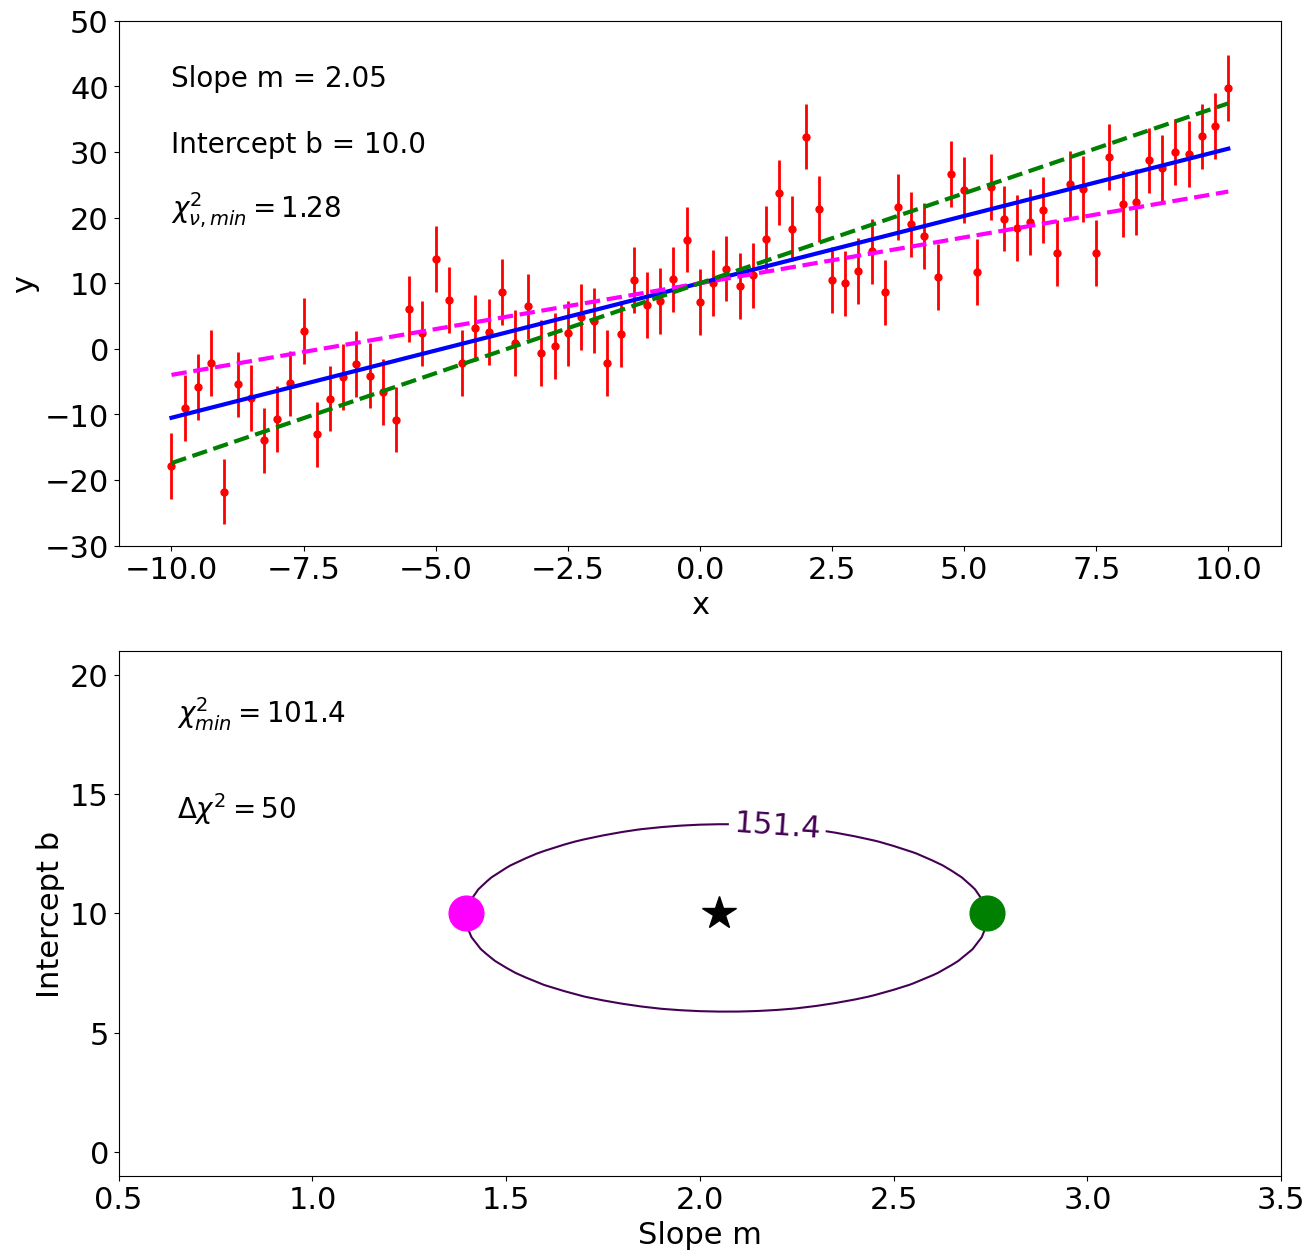


       Correlation Matrix

              Slope  Intercept
Slope         1.0   0.0
Intercept     0.0    1.0


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt


def func(x, slope, intercept):
    """calculates the model"""
    line = intercept + slope*x
    return line


def chisq(y, sig_y, y_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((y-y_m)**2.0)/(sig_y**2.0))
    return chi2


#set up the fake data
slope = 2.0
intercept = 10.0
sigma = 5.0
#x = np.arange(-5.0, 15.0, 0.25)
x = np.arange(-10, 10.01, 0.25)
y_m = slope*x + intercept
#set up the sigmas as a 1-D vector of the same size as x and y
sig_y = x*0 + sigma
err_y = np.random.normal(0.0, sig_y, x.size)
y = y_m + err_y
#
dof = len(x)-2.0 #the number of degrees of freedom; M = 2 -- slope and intercept


#now we create a grid of slopes and intercepts and calculate chi-squared for each of them
slopes = np.arange(1.0, 3.01, 0.05) #the grid of slopes we're going to test
intercepts = np.arange(-5.0, 25.01, 0.5) #the grid of slopes we're going to test
slopes_grid, intercepts_grid = np.meshgrid(slopes, intercepts, indexing='xy')
#note that the indexing scheme used here is different from that in the last session's
#use of meshgrid, since plt.contour() requires 'xy' style indexing...

chi2 = 1.e5 + slopes_grid*0.0  #setting up the grid of chisquareds  
redc2 = 1.e5 + slopes_grid*0.0 #setting up the grid of chisquareds  
colorscale = slopes_grid*0.0 #setting up the grid of colors
best_slope = 1.e5 
best_chi2 = 1.e5
best_redc2 = 1.e5
i = 0
for m in slopes:
    j = 0
    for b in intercepts:
        y_test = m*x + b
        chi2[j, i] = chisq(y, sig_y, y_test)
        redc2[j, i] = chi2[j, i]/(x.size-2.0)
        if (chi2[j, i] < best_chi2):
            best_chi2 = chi2[j, i]
            best_redc2 = redc2[j, i]
            best_slope = m
            best_intercept = b
        j = j+1
    i = i+1

#first plot the chisq contours in slope vs intercept    
plt.subplot(2,1,2)
plt.xlabel('Slope m')
plt.ylabel('Intercept b')
plt.plot(best_slope, best_intercept, color='black', marker="*", markersize=25)
plt.axis([0.5, 3.5, -1, 21])
#define the z-level we want to place our contour at
delta_chi2 = 50
levs = [best_chi2 + delta_chi2]
#plot the contours:
cs = plt.contour(slopes, intercepts, chi2, levels=levs) #plot contours at given levels
#label the contours
plt.clabel(cs, inline=1,fmt='%5.1f') 
#
c2string = r'$\chi^2_{min} =$' +  str(np.round(best_chi2, 1))
plt.text(0.65, 18., c2string, fontsize=20)
dc2string = r'$\Delta\chi^2 =$' +  str(np.round(delta_chi2, 0))
plt.text(0.65, 14.0, dc2string, fontsize=20)
#
#here is a little trick to extract the x,y coordinates 
#of the actual contour line plotted
v = cs.collections[0].get_paths()[0].vertices
xtest = v[:,0]
ytest = v[:,1]
#if you want to test this out, try plotting these directly
#plt.plot(xtest, ytest, color='green', marker="o", markersize=3)
#
#let's get a couple of "extreme" points on the contour
#we'll take the two points with the most extreme slopes (and the corresponding
#intercepts, of course)
sort_index = np.argsort(xtest)
slope_test1 = xtest[sort_index[0]]
intercept_test1 = ytest[sort_index[0]]
slope_test2 = xtest[sort_index[-1]]
intercept_test2 = ytest[sort_index[-1]]
plt.plot(slope_test1, intercept_test1, color='magenta', marker="o", markersize=25)
plt.plot(slope_test2, intercept_test2, color='green', marker="o", markersize=25)


#now plot the best fitting model and the two extreme delta-chisq models
plt.subplot(2,1,1)
y_best = best_slope*x + best_intercept 
y_test1 = slope_test1*x + intercept_test1
y_test2 = slope_test2*x + intercept_test2
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(x, y, yerr=sig_y, color="red", linewidth=2, linestyle="None")
plt.plot(x, y_best, color='blue', marker="None", linewidth=3, linestyle="-")
plt.plot(x, y_test1, color='magenta', marker="None", linewidth=3, linestyle="dashed")
plt.plot(x, y_test2, color='green', marker="None", linewidth=3, linestyle="dashed")
#
c2string = r'$\chi_{\nu,min}^2 =$' +  str(np.round(best_redc2, 2))
plt.text(-10.0, 20, c2string, fontsize=20)
sstring = 'Slope m = ' +  str(np.round(best_slope, 2))
plt.text(-10.0, 40, sstring, fontsize=20)
istring = 'Intercept b = ' +  str(np.round(best_intercept, 2))
plt.text(-10.0, 30, istring, fontsize=20)
plt.axis([-11, 11, -30, 50])

plt.show()




#now compare to the curve_fit results
start_slope = 5.0 #this is our starting slope for the LM algorithm
start_intercept = -10 #this is our starting intercept for the LM algorithm
best_pars, covar = opt.curve_fit(f=func, xdata=x, ydata=y, 
                                       sigma=sig_y, p0=(start_slope, start_intercept),
                                       absolute_sigma=True)

#let's convert the covariance matrix to the correlation matrix
#
#first, we get the parameter errors
sig_slope = np.sqrt(covar[0, 0])
sig_intercept = np.sqrt(covar[1, 1])
#
#next, we convert (co)variances to correlations
corr_ss = covar[0, 0]/(sig_slope*sig_slope)
corr_ii = covar[1, 1]/(sig_intercept*sig_intercept)
corr_si = covar[0, 1]/(sig_slope*sig_intercept)
corr_is = covar[1, 0]/(sig_intercept*sig_slope)

print()
print('       Correlation Matrix')
print('       ==================')
print()
print('              Slope ', 'Intercept')
print('Slope        ', np.round(corr_ss, 3), ' ', np.round(corr_si,3))
print('Intercept    ', np.round(corr_is, 3),'  ', np.round(corr_ii,3))

**Success!**

Our simple strategy has managed to completely eliminate the correlation between slope and intercept!

**Shifting $x$ values so that $\overline{x} \simeq 0$ before fitting is pretty much always a good idea!**

### The assumptions underlying the $\Delta\chi^2$ method

Let's finally spell out the assumptions we have to make in order to connect a given value of $\Delta\chi^2$ with a specific confidence level determined from the $\chi^2$ distribution with $\nu = M$ (where $M$ is the number of model parameters).

If our optimal model parameters, $a_{j}^*$, were estimated by minimizing $\chi^2$, all of the machinery outlined above holds, provided two critical assumptions are satisfied:

1. the errors $\sigma_i$ on the data are *normally distributed* (i.e. *Gaussian*);
<br><br>
2. the model is *linear* in its parameters, $y_m(x) = a_1 f_1(x) + a_2 f_2(x) + ... + a_M f_M(x)$.

Let's expand on these assumptions a little. 

First, assumption (1) does not require that the errors are the same, just that each individual error is Gaussian. How do we know this in practice? Well, often we don't! However, thanks to the central limit theorem, it is generally OK to *assume* that our errors are Gaussian, unless we have reason(s) to suspect otherwise. One such reason might be that our uncertainties are dominated by a single source of error (rather than being due to a combination of lots of smaller sources of error).

Second, assumption (2) does not require the model to be a straight line; only its dependence on the model parameters, $a_j$, must be linear:
$$y_m(x) = \sum_{i=1}^{M} a_j f_j(x) = a_1 f_1(x) + a_2 f_2(x) + ... + a_M f_M(x).$$
The $f_j(x)$ can be arbitrary functions in this expression, including non-linear functions.

In fact, assumption (2) can be relaxed a little bit: it is not really necessary that the model is linear in the parameters *everywhere*, just that it is *approximately linear in the vicinity of the optimal fit, $a_j^*$.* What defines the "vicinity"? In this context, it simply means the region of parameter space defined by our parameter uncertainties.

But how are we supposed to know if some non-linear model is "sufficiently" linear in the parameters near our best-fit? A straightforward way to at least sanity-check this is to look at the shape of the confidence contours. Are they simple ellipses? If yes -- and the errors are Gaussian -- it is probably fine to assume that the theoretically motivated link between $\Delta\chi^2$ and confidence level holds.

## (Optional/Bonus:) Confidence regions from simulations: creating the data we might have obtained

In this final (optional) section, we will take a very brief look at what I think is one of the coolest way to estimate errors on almost anything. 

Since this is strictly bonus material, we'll basically just sketch the basic ideas and algorithms.

The idea here is incredibly simple:

* We have repeatedly noted this idea that our actual data is really just one particular realization from a universe of equivalent data sets we might have obtained


* So we can try to *simulate* lots of data sets that we might have observed


* We can then fit each of these in the same way as the real data


* And if we record the fit parameters we obtain in each case, we can use the distribution of those fit parameters to estimate the uncertainties. 

For example, in the case of a linear fit with slope and intercept:

* the standard deviation of all the best-fit slopes $\simeq$ uncertainty on the "actual" best-fit slope


* the standard deviation of all the best-fit intercepts $\simeq$ uncertainty on the "actual" best-fit intercept


* we can also make histograms of the distributions to check whether they look "Normal"


* we can also plot the best_fit slopes vs best_fit intercepts to check for correlations

It is not actually particularly difficult to do this, either conceptually or computationally. And it's actually a fantastic way to directly translate the way we've learned to think about data -- as particular realisations of what we might have seen -- into a method for estimating uncertainties.

### [Optional] Mock data from Monte Carlo simulations

The first way to create simulated (aka "mock") data sets from the existing data is by drawing new random numbers in accordance with the uncertainties.

* Suppose we have an observation $x_i$, $y_i$ and $\sigma_{y_i}$.


* We have also already carried out a $\chi^2$ fit to this

    * the model predicts $y_{i,m}$ at $x_i$ 

    * this should hopefully be within $\simeq \sigma_{y_i}$ of $y_i$


* We want to generate a new "realization" of this observation

    * since $x_i$ is allegedly perfectly known, we keep it 

    * we also assume that $\sigma_{y_i}$ is well known, so we keep it as well
    
    * so only $y_i$ is really uncertain, so this is what we have to generate a new realization ("mock value") for

    
* There are two ways of doing this (i.e. creating a mock version of $y_{i}$)

  * we can approximate the "true" value of $y(x_i)$ by the data: $y_{true} \simeq y_i$
      * so we generate $y_{i,mock}$ by drawing a random number from a Normal distribution with mean $y_i$ and standard deviation $\sigma_{y_i}$
             
  * we can approximate the "true" value of $y(x_i)$ by the model: $y_{true} \simeq y_{i,m}$
      * so we generate $y_{i,mock}$ by drawing a random number from a Normal distribution with mean $y_{i,m}$ and standard deviation $\sigma_{y_i}$


* If we have $N_{data}$ such observations, we can use this method to generate an entirely new simulated data set, $x_i$, $y_{i,mock}$, $\sigma_{i}$ for $i = 1...N_{data}$


* We then fit this data set with our model just like the real data set and record the fit parameters


* We finally repeat the entire procedure for $N_{mock}$ fake data sets
    * the standard deviations of all the best-fit parameters provide us with estimates of the parameter uncertainties
    * we usually want $N_{mock} \gtrsim 100$ to get decent error estimates)

Which of these two methods is better? Strictly speaking, the second. 

After all, assuming $y_{true} \simeq y_{i,m}$ is really just implementing our null hypothesis that the model is correct.

By contrast, assuming $y_{true} \simeq y_i$ is pretty much never correct -- after all, we *know* that the data point is scattered away from the "truth" by $\simeq \sigma_{y_i}$. So this method actually creates mock data that is *worse* -- i.e. exhibits more scatter -- than the real data. 
(At least for linear models, this doesn't actually affect the resulting error estimates. However, it does mean the minimum $\chi^2$ values achieved for the mock data will be systematically higher than those achieved for the real data.)

### [Optional] Mock data from bootstrapping

The second way to create simulated ("mock") data sets is to "bootstrap". The idea here is that we do not change any one data point *at all*. 

Instead, in each mock data set, we just throw out a random bunch of data points and instead include others twice. 

Specifically, if we have $N_{data}$ data points, we create a new mock data set as follows:

    repeat the following N_data times:

        * draw a random number i between 1 and N_data
        
        * include data point i -- x_i, y_i, sigma_y -- in the mock data set

This is called "resampling with replacement".

Since we are picking $i$ at random, some values between 1 and $N_{data]$ will not get picked at all, while others will get picked twice (or maybe even three times).

The rest of the method is identical to the Monte Carlo version:

* we create $N_{mock}$ data sets using resampling with replacement

* we fit each data set with our model and record the best-fit parameters

* we estimate errors on the parameters from the standard deviations of all the best-fit parameters

If this bootstrapping method strikes you as a bit crazy -- i.e. it's like getting something from nothing -- you are not alone. However, it is actually a well-tested and well-established method, and quite a few theorems have been proven that establish its underpinnings.

However, it's really important to understand that we are making one really critical and strong assumption when we apply bootstrapping:

**Bootstrapping assumes that all data points are roughly equally important in constraining the fit parameters.**

If our $\sigma_{y_i}$ values aren't constant, and we're doing $\chi^2$ fits, this is obviously not *exactly* true, by definition. After all, each point then contributes a little bit differently, just because it is weighted by $1/sigma_{y_i}^2$ in the $\chi^2$ sum. But as long as the weights are not *too* different, bootstrapping can still be OK.

The other way in which this assumption can fail is if some points just happen to be more important for other reasons. For example, if we do a straight-line fit in which most points are bunched up near $x \simeq 1$, but we have one point at $x \simeq 100$, then that point will have a much stronger effect on the fit than any of the other points. So any mock data set in which that point is thrown out is going to be very different from the real data -- and therefore the resulting fit parameters will not be representative anymore.

These considerations nicely bring us to...

### The Golden Rules of Mock Data

**Rule 1: Your mock data shall resemble your real data as closely as possible**

**Rule 2: You shall analyse your mock data set(s) in exactly the same way as your actual data set**

As long as we don't violate these rules, simulations and mock data provide us with a really simple and powerful tool for estimating uncertainties in even the most complex and intractable situations.

##  [Optional] Big Picture Exercise: errors on the Hubble Constant from the fake data set

In the last two sessions, our big picture exercises were (i) creating a fake galaxy data set from which the Hubble Constant could be measured; (ii) fitting this fake data set to get a best-fit Hubble Constant from the fit. The fake data consisted of distances, distance errors and recession velocities for a set of galaxies.

Building on this, in today's Big Picture Exercise we'll derive the 1-$\sigma$ uncertainties on the best-fit Hubble Constant and check if this agrees with the true (input) value.

The main thing I'd like you to do is derive the error on your best-fit $H_0$ via the $\Delta \chi^2 = 1$ method we'll discuss in detail today.

If you have time and are interested, it would be awesome if you could also have a go at deriving errors on $H_0$ via simulations, using the two methods we'll briefly touch on in the bonus material:

* Monte Carlo simulations
* Bootstrapping

This is purely optional though.